In [1]:
# Import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.gridspec as gridspec

# Here are my rc parameters for matplotlib
mpl.rc('font', serif='Helvetica Neue') 
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 1000
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.5

# This link shows you how to greyscale a cmap
# https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html

def find(name):
    home = os.path.expanduser("~")
    for root, dirs, files in os.walk(home):
        if name in dirs:
            return os.path.join(root, name)

In [2]:
# First let's find all of our data
whingPath = find('whingdingdilly')
ipyPath = whingPath + '/ipython'
rootPath = ipyPath + '/figures_for_all_data/data_rclust_1.05/data_1.05'

activityRatioPath = rootPath + '/actRatio'
particleFractionPath = rootPath + '/parFrac'
monodispersePath = rootPath + '/mono'
constantRatioPath = rootPath + '/constRat'
cl = '/clusterSizes'
di = '/diams'

# Go to the correct parent directory
os.chdir(rootPath)

# Create a list for the filenames
fileContainer = []
pathContainer = []

# Source directory for cluster data
actRatFiles = os.listdir(activityRatioPath + cl)
parFracFiles = os.listdir(particleFractionPath + cl)
monoFiles = os.listdir(monodispersePath + cl)
constFiles = os.listdir(constantRatioPath + cl)


# Create list of sweep identifiers
sweepName = ['Activity Ratio', 'Particle Fraction', 'Monodisperse', 'Constant Activity Ratio']
# Populate the file container
fileContainer.append(actRatFiles)
fileContainer.append(parFracFiles)
fileContainer.append(monoFiles)
fileContainer.append(constFiles)
nSweeps = len(fileContainer)
# Populate the path container
pathContainer.append(activityRatioPath)
pathContainer.append(particleFractionPath)
pathContainer.append(monodispersePath)
pathContainer.append(constantRatioPath)

In [3]:
# Functions to sort my data with
def getFromTxt(fname, first, last):
    """Takes a string, text before and after desired text, outs text between"""
    start = fname.index( first ) + len( first )
    end = fname.index( last, start )
    myTxt = fname[start:end]
    return float(myTxt)
        
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Let's sort our respective lists
for i in xrange(nSweeps):
    paList = []
    pbList = []
    prList = []
    xfList = []
    for j in xrange(len(fileContainer[i])):
        paList.append(getFromTxt(fileContainer[i][j], "pa", "_pb"))
        pbList.append(getFromTxt(fileContainer[i][j], "pb", "_xa"))
        xfList.append(getFromTxt(fileContainer[i][j], "xa", "_ep"))
        xfList[j] = 100.0 - xfList[j]
        # We want to use ratios rounded to nearest 0.05
        try:
            tmpPeR = round(paList[j]/pbList[j] * 2, 1) / 2
        except:
            tmpPeR = 1.0
        prList.append(tmpPeR)
    # Now sort the array of txtFile names
    indArr = multiSort(prList, paList, xfList)
    indSort(fileContainer[i], indArr)
    
# # Use this to check the parameter sort
# for i in xrange(len(fileContainer[1])):
#     print(fileContainer[1][i])

In [5]:
# Read the data for each parameter study into a pandas dataframe
all_sims = []
for i in xrange(nSweeps):
    all_sims.append([])
    os.chdir(pathContainer[i] + cl)
    for j in xrange(len(fileContainer[i])):
        df = pd.read_csv(fileContainer[i][j], sep='\s+', header=0)
        all_sims[i].append(df)
        
# Go back to the source folder (save figures here)
os.chdir(rootPath)        

# If you want to see what your data looks like
# display(all_sims[0][0])

# Get the name of each of the headers in the dataframes
list(all_sims[0][0])

['Timestep',
 'sigALL',
 'sigAA',
 'sigAB',
 'sigBB',
 'MCS',
 'C_num',
 'C1_A',
 'C1_B',
 'C2-10_A',
 'C2-10_B',
 'C10-100_A',
 'C10-100_B',
 'C100-1000_A',
 'C100-1000_B',
 'Cgt1000_A',
 'Cgt1000_B',
 'Lc_numA',
 'Lc_numB']

In [6]:
# Make sure all data is chronilogical
def chkSort(array):
    """Make sure array is chronilogical"""
    for i in xrange(len(array)-2):
        if array[i] > array[i+1]:
            print("{} is not greater than {} for indices=({},{})").format(array[i+1], array[i], i, i+1)
            return False
    return True

# Check to see if timesteps are in order
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        myBool = chkSort(all_sims[i][j]['Timestep'])
        if myBool is False:
            print("{} is not chronilogically sorted!").format(fileContainer[i][j])
            exit(1)
        else:
            print("{} sorted... ").format(fileContainer[i][j])

clustSize_pa0_pb500_xa90_ep82.txt sorted... 
clustSize_pa0_pb500_xa70_ep82.txt sorted... 
clustSize_pa0_pb500_xa50_ep82.txt sorted... 
clustSize_pa0_pb500_xa30_ep82.txt sorted... 
clustSize_pa50_pb500_xa90_ep82.txt sorted... 
clustSize_pa50_pb500_xa70_ep82.txt sorted... 
clustSize_pa50_pb500_xa50_ep82.txt sorted... 
clustSize_pa50_pb500_xa30_ep82.txt sorted... 
clustSize_pa100_pb500_xa90_ep82.txt sorted... 
clustSize_pa100_pb500_xa70_ep82.txt sorted... 
clustSize_pa100_pb500_xa50_ep82.txt sorted... 
clustSize_pa100_pb500_xa30_ep82.txt sorted... 
clustSize_pa150_pb500_xa90_ep82.txt sorted... 
clustSize_pa150_pb500_xa70_ep82.txt sorted... 
clustSize_pa150_pb500_xa50_ep82.txt sorted... 
clustSize_pa150_pb500_xa30_ep82.txt sorted... 
clustSize_pa200_pb500_xa90_ep82.txt sorted... 
clustSize_pa200_pb500_xa70_ep82.txt sorted... 
clustSize_pa200_pb500_xa50_ep82.txt sorted... 
clustSize_pa200_pb500_xa30_ep82.txt sorted... 
clustSize_pa250_pb500_xa90_ep82.txt sorted... 
clustSize_pa250_pb500_xa7

clustSize_pa120_pb400_xa50_ep66.txt sorted... 
clustSize_pa120_pb400_xa30_ep66.txt sorted... 
clustSize_pa130_pb433_xa70_ep71.txt sorted... 
clustSize_pa130_pb433_xa50_ep71.txt sorted... 
clustSize_pa130_pb433_xa30_ep71.txt sorted... 
clustSize_pa140_pb466_xa70_ep76.txt sorted... 
clustSize_pa140_pb466_xa50_ep76.txt sorted... 
clustSize_pa140_pb466_xa30_ep76.txt sorted... 
clustSize_pa150_pb500_xa70_ep82.txt sorted... 
clustSize_pa150_pb500_xa30_ep82.txt sorted... 
clustSize_pa10_pb20_xa70_ep5.txt sorted... 
clustSize_pa10_pb20_xa50_ep5.txt sorted... 
clustSize_pa10_pb20_xa30_ep5.txt sorted... 
clustSize_pa20_pb40_xa70_ep8.txt sorted... 
clustSize_pa20_pb40_xa50_ep8.txt sorted... 
clustSize_pa20_pb40_xa30_ep8.txt sorted... 
clustSize_pa30_pb60_xa70_ep11.txt sorted... 
clustSize_pa30_pb60_xa50_ep11.txt sorted... 
clustSize_pa30_pb60_xa30_ep11.txt sorted... 
clustSize_pa40_pb80_xa70_ep14.txt sorted... 
clustSize_pa40_pb80_xa50_ep14.txt sorted... 
clustSize_pa40_pb80_xa30_ep14.txt sorted.

In [7]:
# # Add a column to the all_sims dataframe for number of clusters (of threshold size):
# for i in xrange(nSweeps):
#     for j in xrange(len(fileContainer[i])):
#         # New column for number of clusters
#         all_sims[i][j]['nClust'] = all_sims[i][j]['Dense_tot'] / all_sims[i][j]['MCS']
#         # Ger rid of NaN in favor of 0
#         all_sims[i][j].fillna(0, inplace=True)

# # display(all_sims[0][0])
# list(all_sims[0][0])

In [8]:
# Test cell to figure out how to get specific column indices
headers = list(all_sims[0][0])
print(headers)
# iloc does df.iloc[row, column]
A_inds = [7, 9, 11, 13, 15]
B_inds = [x + 1 for x in A_inds]

# Function that will sort wrt one variable
def singleSort(arr):
    for i in xrange(len(arr)):
        for j in xrange(len(arr)):
            if arr[i] < arr[j] and i > j:
                arr[i], arr[j] = arr[j], arr[i]
                
# Function to get conversion from timesteps to Brownian time
def computeTauPerTstep(epsilon):
    kBT = 1.0
    tstepPerTau = int(epsilon / (kBT * 0.00001))
    return tstepPerTau

def theoryDenom(xF, peS, peF):
    xF /= 100.0
    xS = 1.0 - xF
    return ((xS * peS) + (xF * peF))

def theory(xF, peS, peF):
    kappa = 4.05
    xF /= 100.0
    xS = 1.0 - xF
    return ((3.0 * (np.pi**2) * kappa) / (4.0 * ((xS * peS) + (xF * peF))))

# Make an additional frame that gives total number of particles, and simulation parameters
params = []
for i in xrange(nSweeps):
    paramList = []
    for j in xrange(len(fileContainer[i])):
        # A particles
        partA = 0
        for k in A_inds:
            partA += all_sims[i][j].iloc[1, k]
        # B particles
        partB = 0
        for k in B_inds:
            partB += all_sims[i][j].iloc[1, k]
        # All particles
        partAll = partA + partB
        
        pa = getFromTxt(fileContainer[i][j], "pa", "_pb")
        pb = getFromTxt(fileContainer[i][j], "pb", "_xa")
        xa = getFromTxt(fileContainer[i][j], "xa", "_ep")
        xf = 100.0 - xa
        
        if (partAll * xa / 100.0) != partA or (partAll * xf / 100.0) != partB:
            print("BAD DATA: {}").format(fileContainer[i][j])
            
        ep = getFromTxt(fileContainer[i][j], "ep", ".txt")
        converT = computeTauPerTstep(ep)
        mytheoryDenom = theoryDenom(xf, pa, pb)
        if (pa != 0 and xa != 0) or (pb != 0 and xf != 0): 
            mytheory = theory(xf, pa, pb)
        else:
            mytheory = 0.0

        # This is monodisperse
        if pb == 0 and xa == 100:
            prat = 1.0

        # This is active/passive
        elif pb == 0 and xa != 100:
            prat = 0.0

        # Everything else
        else:
            # Round to the nearest tenths place
            prat = round(float(pa)/float(pb) * 2, 1) / 2

        paramList.append((partAll, partA, partB, pa, pb, xf, prat, ep, converT, mytheoryDenom, mytheory))

    # Put the data for this parameter sweep into it's own dataframe
    params.append(pd.DataFrame(paramList, columns=['partAll',
                                                  'partA',
                                                  'partB',
                                                  'peA',
                                                  'peB',
                                                  'xF',
                                                  'peR',
                                                  'eps',
                                                  'brownTime',
                                                  'theoryDenom',
                                                  'theory'])
                 )
    pd.set_option('display.max_rows', 2)
    display(params[i])

['Timestep', 'sigALL', 'sigAA', 'sigAB', 'sigBB', 'MCS', 'C_num', 'C1_A', 'C1_B', 'C2-10_A', 'C2-10_B', 'C10-100_A', 'C10-100_B', 'C100-1000_A', 'C100-1000_B', 'Cgt1000_A', 'Cgt1000_B', 'Lc_numA', 'Lc_numB']


partAll  partA  partB    peA    peB    xF  peR   eps  brownTime  \
0    100000  90000  10000    0.0  500.0  10.0  0.0  82.0    8199999   
..      ...    ...    ...    ...    ...   ...  ...   ...        ...   
42   100000  50000  50000  500.0  500.0  50.0  1.0  82.0    8199999   

    theoryDenom    theory  
0          50.0  0.599578  
..          ...       ...  
42        500.0  0.059958  

[43 rows x 11 columns]

partAll  partA  partB    peA    peB    xF   peR   eps  brownTime  \
0    100000  90000  10000    0.0  500.0  10.0  0.00  82.0    8199999   
..      ...    ...    ...    ...    ...   ...   ...   ...        ...   
77   100000  10000  90000  375.0  500.0  90.0  0.75  82.0    8199999   

    theoryDenom    theory  
0          50.0  0.599578  
..          ...       ...  
77        487.5  0.061495  

[78 rows x 11 columns]

partAll   partA  partB    peA    peB   xF  peR   eps  brownTime  \
0    100000  100000      0    0.0  500.0  0.0  0.0  82.0    8199999   
..      ...     ...    ...    ...    ...  ...  ...   ...        ...   
10   100000  100000      0  500.0  500.0  0.0  1.0  82.0    8199999   

    theoryDenom    theory  
0           0.0  0.000000  
..          ...       ...  
10        500.0  0.059958  

[11 rows x 11 columns]

partAll  partA  partB    peA    peB    xF  peR   eps  brownTime  \
0      50000  25000  25000   10.0  100.0  50.0  0.1  18.0    1799999   
..       ...    ...    ...    ...    ...   ...  ...   ...        ...   
148    50000  15000  35000  150.0  214.0  70.0  0.7  36.0    3599999   

     theoryDenom    theory  
0           55.0  0.545071  
..           ...       ...  
148        194.8  0.153896  

[149 rows x 11 columns]

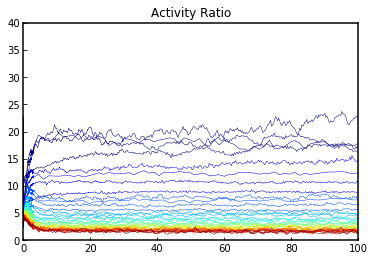

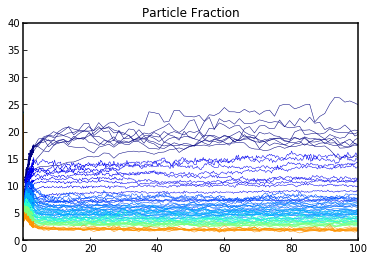

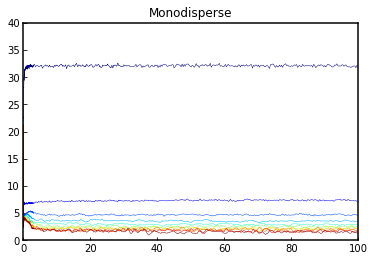

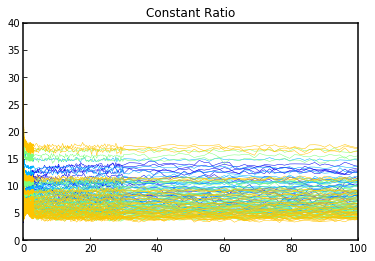

In [9]:
# Make sure I haven't messed up my data (shows gas over time)
sim_titles = ['Activity Ratio', 'Particle Fraction', 'Monodisperse', 'Constant Ratio']
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['C1_A'][:] / params[i]['partA'][j] * 100.0,
                 c=plt.cm.jet(params[i]['peR'][j]),
                 label=str(params[i]['peR'][j]))
        plt.title(sim_titles[i])
    plt.xlim(0, 100)
    plt.ylim(0,40)
    plt.show()

Number of textfiles before delete: 43
Number of all_sims dataframes before delete: 43
Params rows before delete: 43
Number of textfiles after delete: 43
Number of all_sims dataframes after delete: 43
Params rows after delete: 43


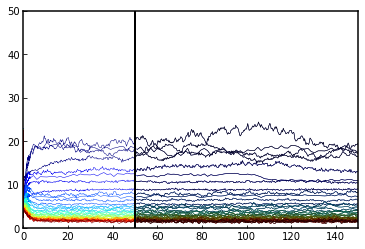

Number of textfiles before delete: 78
Number of all_sims dataframes before delete: 78
Params rows before delete: 78
Number of textfiles after delete: 78
Number of all_sims dataframes after delete: 78
Params rows after delete: 78


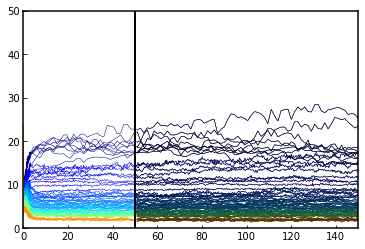

Number of textfiles before delete: 11
Number of all_sims dataframes before delete: 11
Params rows before delete: 11
Number of textfiles after delete: 11
Number of all_sims dataframes after delete: 11
Params rows after delete: 11


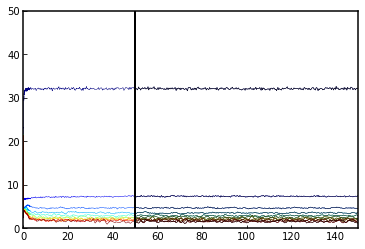

Number of textfiles before delete: 149
Number of all_sims dataframes before delete: 149
Params rows before delete: 149
Number of textfiles after delete: 144
Number of all_sims dataframes after delete: 144
Params rows after delete: 144


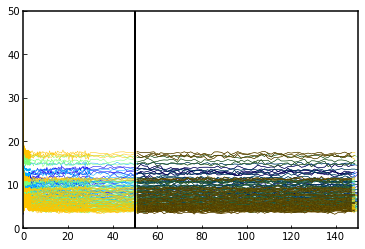

In [10]:
# We should average past a specific time, not an index number...
ssStartTime = 50.0
ssStartInd = [ [] for i in xrange(nSweeps) ]
badFiles = [ [] for i in xrange(nSweeps) ]

# Figure out what we should use for steady-state
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if all_sims[i][j]['Timestep'].iloc[-1] / params[i]['brownTime'][j] * 3.0 >= ssStartTime:
            for k in xrange(len(all_sims[i][j]['Timestep'])):
                if all_sims[i][j]['Timestep'][k] / params[i]['brownTime'][j] * 3.0 >= ssStartTime:
                    ssStartInd[i].append(k)
                    break
        else:
            badFiles[i].append(j)

# Delete rows of dataframe
for i in xrange(nSweeps):
    # Remove these indices from: txtFiles, all_sims, params
    print("Number of textfiles before delete: {}").format(len(fileContainer[i]))
    print("Number of all_sims dataframes before delete: {}").format(len(all_sims[i]))
    print("Params rows before delete: {}").format(len(params[i]['partAll']))
    if badFiles[i]:
        # You have to reverse the order so that you don't mess up your indexing
        for myindex in sorted(badFiles[i], reverse=True):
            del fileContainer[i][myindex]
            del all_sims[i][myindex]
            params[i].drop(params[i].index[myindex], inplace=True)  
    print("Number of textfiles after delete: {}").format(len(fileContainer[i]))
    print("Number of all_sims dataframes after delete: {}").format(len(all_sims[i]))
    print("Params rows after delete: {}").format(len(params[i]['partAll']))

    # You have to reindex the dataframe
    params[i].index = range(len(params[i]['partAll']))

    # Visual check to see if this is the appropriate time window for steady-state
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['C1_A'][:] / params[i]['partA'][j] * 100.0,
                 c=plt.cm.jet(params[i]['peR'][j]),
                 label=str(params[i]['peR'][j]))
        plt.plot(all_sims[i][j]['Timestep'][ssStartInd[i][j]:-1] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['C1_A'][ssStartInd[i][j]:-1] / params[i]['partA'][j] * 100.0,
                 c='k')
    plt.axvline(ssStartTime, lw=2.0, c='k')
    plt.xlim(0, 150)
    plt.ylim(0, 50)
    plt.show()

In [11]:
# I'll need to normalize the LC composition as well
A_inds = [7, 9, 11, 13, 15]
B_inds = [x + 1 for x in A_inds]
A_inds.append(A_inds[-1] + 2)
B_inds.append(B_inds[-1] + 2)

# Now get time-based steady state values
all_SS = []
all_stdDev = []
all_var = []
totHeaders = ['C1_AB', 'C2-10_AB', 'C10-100_AB', 'C100-1000_AB', 'Cgt1000_AB', 'Lc_numAB']
for i in xrange(nSweeps):
    # Make list of steady state column headers
    headers = list(all_sims[i][0])
    headers.remove('Timestep')
    SS = pd.DataFrame(columns=headers)
    stdDev = pd.DataFrame(columns=headers)
    var = pd.DataFrame(columns=headers)
    # Initialize dataframes
    for j in xrange(len(fileContainer[i])):
        SS.loc[j] = [0] * len(headers)
        stdDev.loc[j] = [0] * len(headers)
        var.loc[j] = [0] * len(headers)

    # Make dataframe of steady-state data
    for j in xrange(len(fileContainer[i])):
        # Loop through each column (aside from tstep column)
        for k in range(1, len(all_sims[i][j].iloc[1])):
            # Compute mean of data after steady-state time (25tb) in jth column of ith file
            avg = np.mean(all_sims[i][j].iloc[ssStartInd[i][j]:-1, k])
            SS[headers[k-1]][j] = avg
            # Compute the standard deviation and variance in this data
            stdDevor = np.std(all_sims[i][j].iloc[ssStartInd[i][j]:-1, k])
            stdDev[headers[k-1]][j] = stdDevor
            var[headers[k-1]][j] = stdDevor ** 2

    # Normalize by number of particles and add the total statistics
    for j in xrange(len(fileContainer[i])):
        if params[i]['partA'][j] != 0:
            # Remember that 'Timestep column was removed'
            for k in A_inds:
                SS.iloc[j, k-1] /= (params[i]['partA'][j] / 100.0)
                # Now my standard error is a percentage
                stdDev.iloc[j, k-1] /= (params[i]['partA'][j] / 100.0)
                # And variance
                var.iloc[j, k-1] /= (params[i]['partA'][j] / 100.0)

        if params[i]['partB'][j] != 0:
            for k in B_inds:
                SS.iloc[j, k-1] /= (params[i]['partB'][j] / 100.0)
                # Now my standard error is a percentage
                stdDev.iloc[j, k-1] /= (params[i]['partB'][j] / 100.0)
                # And variance
                var.iloc[j, k-1] /= (params[i]['partB'][j] / 100.0)

    # You can't divide by the number of particles, MCS is independent of N
#     SS['MCS'][:] /= (params[i]['partAll'][:] / 100.0)
    SS['C_num'][:] /= (params[i]['partAll'][:] / 100.0)
#     stdDev['MCS'][:] /= (params[i]['partAll'][:] / 100.0)
    stdDev['C_num'][:] /= (params[i]['partAll'][:] / 100.0)
#     var['MCS'][:] /= (params[i]['partAll'][:] / 100.0)
    var['C_num'][:] /= (params[i]['partAll'][:] / 100.0)
    
    for j in xrange(len(totHeaders)):
        # Create new column by adding two existing columns
        SS[totHeaders[j]] = ( (SS[headers[A_inds[j]-1]] * params[i]['partA']) +
                             (SS[headers[B_inds[j]-1]] * params[i]['partB']) ) / params[i]['partAll']
        stdDev[totHeaders[j]] = ((stdDev[headers[A_inds[j]-1]] * params[i]['partA'])**2 + (stdDev[headers[B_inds[j]-1]] * params[i]['partB'])**2)
        stdDev[totHeaders[j]] = stdDev[totHeaders[j]].pow(1./2) / params[i]['partAll']
        var[totHeaders[j]] = (stdDev[totHeaders[j]])**2
    # Put these values into the modular container
    all_SS.append(SS)
    all_stdDev.append(stdDev)
    all_var.append(var)
    # Delete these and loop through next parameter sweep
    del SS
    del stdDev
    del var
    
pd.set_option('display.max_rows', 6)
display(all_SS[0])
# display(all_stdDev[0])
# display(all_var[0])

sigALL    sigAA    sigAB    sigBB      MCS    C_num     C1_A      C1_B  \
0   1.00068  1.00076  1.00062  1.00055  4.89916  20.4624   16.764  0.530811   
1   1.00038   1.0004  1.00037  1.00033  6.22099  16.1198  17.6327    1.2284   
2   1.00026  1.00029  1.00025  1.00024   8.5937  11.6666  17.8147   1.28429   
..      ...      ...      ...      ...      ...      ...      ...       ...   
40  1.00006  1.00005  1.00006  1.00001  62.4435  1.63949  1.52214   1.47315   
41  1.00006  1.00006  1.00006  1.00005  58.3609  1.74979  1.61267   1.60801   
42  1.00005  1.00004  1.00005  1.00006  60.5738  1.69167    1.558    1.5613   

     C2-10_A   C2-10_B  ... Cgt1000_A Cgt1000_B  Lc_numA  Lc_numB    C1_AB  \
0    15.3886   5.26276  ...   46.7727   73.1193  39.9249  63.0826  15.1407   
1    11.9282   5.12638  ...   66.0158   91.1054  64.4527  89.0554  12.7114   
2    9.17413   2.83689  ...   71.2129   95.2287  69.9439  93.8001   9.5495   
..       ...       ...  ...       ...       ...      ...      ...      ...   
40  0.272246  0.266396  ...   98.1588   98.2115  98.1367  98.1887  1.51724   
41  0.310824  0.309119  ...   97.9794   97.9842  97.9084  97.9119  1.61127   
42   0.29535  0.293864  ...   98.1071   98.1054  98.0377   98.035  1.55965   

    C2-10_AB  C10-100_AB C100-1000_AB Cgt1000_AB Lc_numAB  
0     14.376     12.5027      8.57324    49.4074  42.2407  
1    9.88765     3.39054     0.467757    73.5427  71.8335  
2    6.00551      1.0287     0.195457    83.2208   81.872  
..       ...         ...          ...        ...      ...  
40  0.271661  0.00791291    0.0391051    98.1641  98.1419  
41  0.310312   0.0105195      0.08703    97.9809  97.9095  
42  0.294607   0.0108398    0.0286408    98.1063  98.0363  

[43 rows x 24 columns]

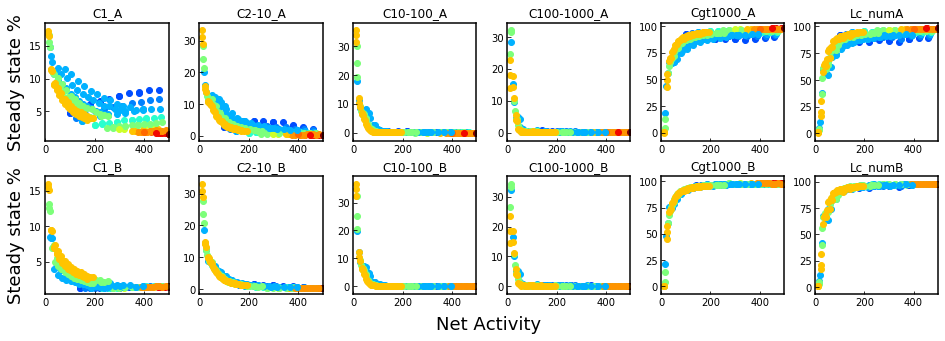

In [12]:
# Okay, the data is wrangled, plot it
PeRNO = [0.0, 0.1]
fig, ax = plt.subplots(2, len(A_inds), figsize=(16, 5))
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        count = 0
        if params[i]['peR'][j] not in PeRNO:
            for k in A_inds:
                # Plot for A
                ax[0][count].scatter(params[i]['theoryDenom'][j],
                            all_SS[i].iloc[j, k - 1],
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=str(params[i]['peR'][j]))
                titles = list(all_SS[i])
                ax[0][count].set_title(titles[k - 1])
                ax[0][count].set_xlim(0, 500)
#                 ax[0][count].set_ylim(0, 100)

                # Now plot for B
                if params[i]['xF'][j] != 0:
                    ax[1][count].scatter(params[i]['theoryDenom'][j],
                                all_SS[i].iloc[j, k],
                                c=plt.cm.jet(params[i]['peR'][j]),
                                label=str(params[i]['peR'][j]))
                titles = list(all_SS[i])
                ax[1][count].set_title(titles[k])
                ax[1][count].set_xlim(0, 500)
#                 ax[1][count].set_ylim(0, 100)
                count += 1
    
ax[0][0].set_ylabel('Steady state %', fontsize=18)
ax[1][0].set_ylabel('Steady state %', fontsize=18)
ax[1][0].text(3.17, -0.3, r'Net Activity', fontsize=18, transform=ax[1][0].transAxes)
plt.subplots_adjust(wspace=0.25, hspace=0.3)
plt.show()

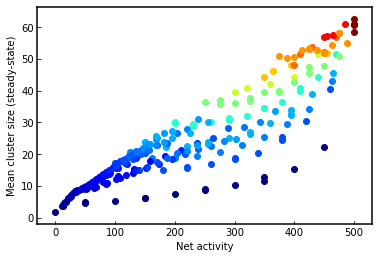

In [13]:
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] != 0.1:
#         if i != 3:
            plt.scatter(params[i]['theoryDenom'][j],
                        all_SS[i]['MCS'][j], c=plt.cm.jet(params[i]['peA'][j]/500.0))
plt.xlabel(r'Net activity')
plt.ylabel(r'Mean cluster size (steady-state)')
plt.show()

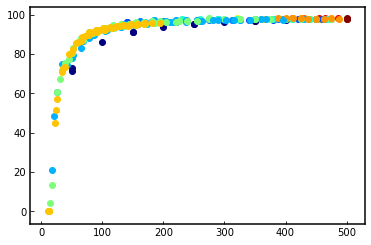

In [14]:
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] != 0.1 and params[i]['xF'][j] != 0:
            plt.scatter(params[i]['theoryDenom'][j],
                        all_SS[i]['Cgt1000_B'][j], c=plt.cm.jet(params[i]['peR'][j]))
plt.show()

Text(0,0.5,'MCS')

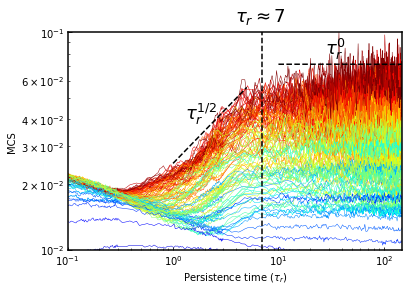

In [15]:
# Let's fit a line to the MCS
def lineFit(x, power, shift):
    return (x**power)/shift

noPlot = [0.0, 0.1]
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['partAll'][j] >= 100000:
#         if params[i]['peR'][j] >= 0.2:
            plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                     all_sims[i][j]['MCS'][:] / params[i]['partAll'][j] * 100.0,
                     c=plt.cm.jet(params[i]['theoryDenom'][j]/500.0),
                     label=str(params[i]['peR'][j]),
                     zorder=0)

# Plot the fit line
xfit = np.arange(10, 1000, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.0, 14)
plt.plot(xfit, yfit, lw=1.5, zorder=1, c='k', linestyle='--')

# Second line
xfit = np.arange(1, 5, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.5, 40)
plt.plot(xfit, yfit, lw=1.5, zorder=1, c='k', linestyle='--')

# Plot text for first line
ax = plt.gca()
plt.text(0.35, 0.6, r'$\tau_{r}^{1/2}$', fontsize=18, transform=ax.transAxes)
plt.text(0.77, 0.9, r'$\tau_{r}^{0}$', fontsize=18, transform=ax.transAxes)
plt.text(0.5, 1.05, r'$\tau_{r}\approx 7$', fontsize=18, transform=ax.transAxes)
plt.axvline(7.0, lw=1.5, linestyle='--', c='k')
            
ax = plt.gca()
ax.loglog()
plt.xlim(10**-1, 150)
plt.ylim(10**-2, 10**-1)
plt.xlabel(r'Persistence time $(\tau_{r})$')
plt.ylabel(r'MCS')

Text(0,0.5,'MCS')

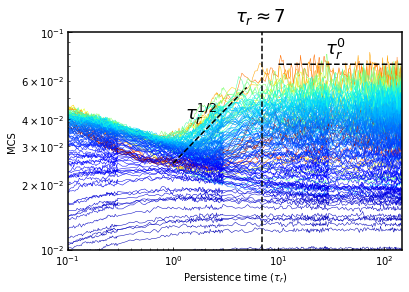

In [16]:
# Only constant particle fraction simulations
# Let's fit a line to the MCS
def lineFit(x, power, shift):
    return (x**power)/shift

noPlot = [0.0, 0.1]
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['partAll'][j] <= 50000 and params[i]['peR'][j] != 0.0:
            plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                     all_sims[i][j]['MCS'][:] / params[i]['partAll'][j] * 100.0,
                     c=plt.cm.jet(params[i]['theoryDenom'][j]/500.0),
                     label=str(params[i]['peR'][j]),
                     zorder=0)

# Plot the fit line
xfit = np.arange(10, 1000, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.0, 14)
plt.plot(xfit, yfit, lw=1.5, zorder=1, c='k', linestyle='--')

# Second line
xfit = np.arange(1, 5, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.5, 40)
plt.plot(xfit, yfit, lw=1.5, zorder=1, c='k', linestyle='--')

# Plot text for first line
ax = plt.gca()
plt.text(0.35, 0.6, r'$\tau_{r}^{1/2}$', fontsize=18, transform=ax.transAxes)
plt.text(0.77, 0.9, r'$\tau_{r}^{0}$', fontsize=18, transform=ax.transAxes)
plt.text(0.5, 1.05, r'$\tau_{r}\approx 7$', fontsize=18, transform=ax.transAxes)
plt.axvline(7.0, lw=1.5, linestyle='--', c='k')
            
ax = plt.gca()
ax.loglog()
plt.xlim(10**-1, 150)
plt.ylim(10**-2, 10**-1)
plt.xlabel(r'Persistence time $(\tau_{r})$')
plt.ylabel(r'MCS')

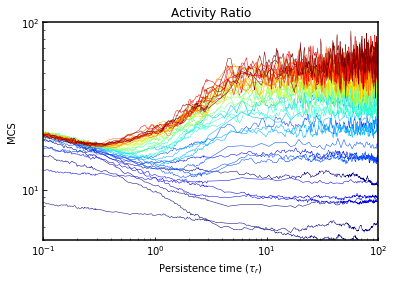

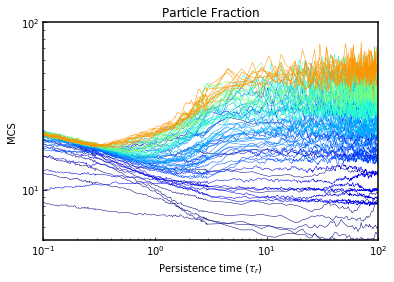

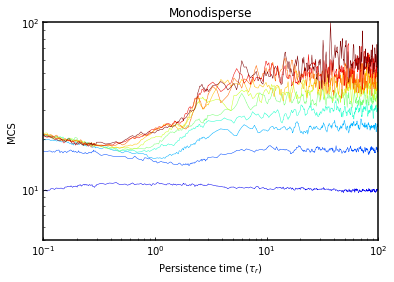

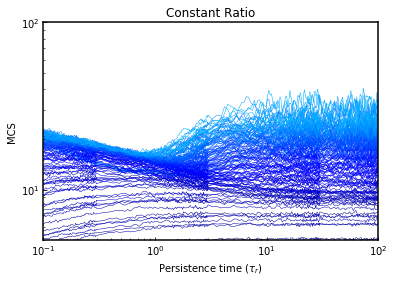

In [17]:
# Let's plot this by simulation sweep instead (why is this data wonky/shifted up?)
# Let's fit a line to the MCS
def lineFit(x, power, shift):
    return (x**power)/shift

count = 0
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['partAll'][j] >= 100000:
            plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                     all_sims[i][j]['MCS'][:],
                     c=plt.cm.jet(params[i]['peA'][j]/500.0),
                     label=str(params[i]['peR'][j]),
                     zorder=0)
        if params[i]['partAll'][j] == 50000:
            plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                     all_sims[i][j]['MCS'][:],
                     c=plt.cm.jet(params[i]['peA'][j]/500.0),
                     label=str(params[i]['peR'][j]),
                     zorder=0)
        
    plt.xlim(10**-1, 10**2)
    plt.ylim(5, 100)
    plt.xlabel(r'Persistence time $(\tau_{r})$')
    plt.ylabel(r'MCS')
    plt.loglog()
    plt.title(sim_titles[i])
    plt.show()
    plt.close()

Text(0,0.5,'MCS')

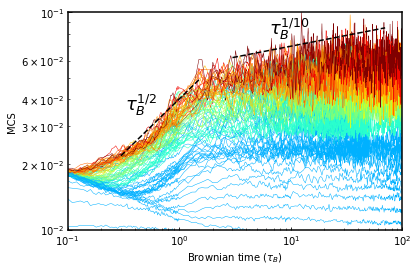

In [18]:
# Let's fit a line to the MCS
def lineFit(x, power, shift):
    return (x**power)/shift

noPlot = [0.0, 0.1, 0.2]
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.3 and params[i]['partAll'][j] >= 100000:
            plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j],
                     all_sims[i][j]['MCS'][:] / params[i]['partAll'][j] * 100.0,
                     c=plt.cm.jet(params[i]['peR'][j]),
                     label=str(params[i]['peR'][j]),
                     zorder=0)

# Plot the fit line
xfit = np.arange(3, 70, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.1, 18)
plt.plot(xfit, yfit, lw=1.5, zorder=1, c='k', linestyle='--')

# Second line
xfit = np.arange(0.3, 1.5, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.5, 25)
plt.plot(xfit, yfit, lw=1.5, zorder=1, c='k', linestyle='--')

# Plot text for first line
ax = plt.gca()
plt.text(0.17, 0.55, r'$\tau_{B}^{1/2}$', fontsize=18, transform=ax.transAxes)
plt.text(0.6, 0.9, r'$\tau_{B}^{1/10}$', fontsize=18, transform=ax.transAxes)
            
ax = plt.gca()
ax.loglog()
plt.xlim(10**-1, 100)
plt.ylim(10**-2, 10**-1)
plt.xlabel(r'Brownian time $(\tau_{B})$')
plt.ylabel(r'MCS')

Text(0,0.5,'MCS')

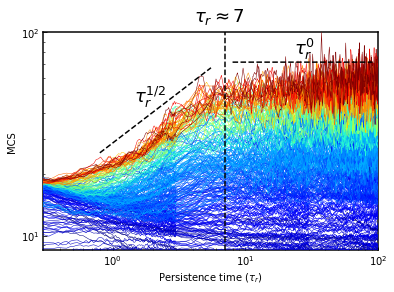

In [19]:
# Plot all lines, order by steady-state value
# Let's fit a line to the MCS
def lineFit(x, power, shift):
    return (x**power)/shift

noPlot = [0.0, 0.1, 0.2]
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['MCS'][:],
                 c=plt.cm.jet(params[i]['peA'][j]/500.0),
                 label=str(params[i]['peA'][j]/500.0),
                 zorder=int(all_SS[i]['MCS'][j]))

# Plot the fit line
xfit = np.arange(8, 90, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.0, 0.014)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')

# Second line
xfit = np.arange(0.8, 5.5, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.5, 0.035)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')

# Plot text for first line
ax = plt.gca()
plt.text(0.27, 0.68, r'$\tau_{r}^{1/2}$', fontsize=18, transform=ax.transAxes, zorder=1001)
plt.text(0.75, 0.9, r'$\tau_{r}^{0}$', fontsize=18, transform=ax.transAxes, zorder=1001)
plt.text(0.45, 1.05, r'$\tau_{r}\approx 7$', fontsize=18, transform=ax.transAxes)
plt.axvline(7.0, lw=1.5, linestyle='--', c='k', zorder=1000)
            
ax = plt.gca()
ax.loglog()
plt.xlim(3*10**-1, 10**2)
plt.ylim(8.5*10**0, 10**2)
plt.xlabel(r'Persistence time $(\tau_{r})$')
plt.ylabel(r'MCS')

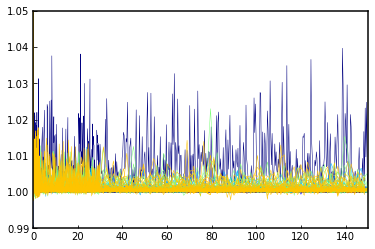

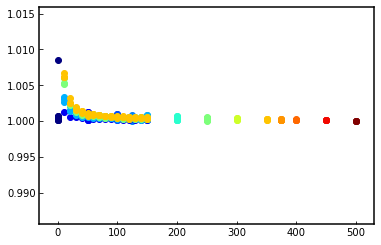

In [20]:
# Let's check the steady-state particle diameter
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['sigALL'][:],
                 c=plt.cm.jet(params[i]['peR'][j]))
plt.xlim(0.001, 150)
plt.ylim(0.99, 1.05)
plt.show()

for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.scatter(params[i]['peA'][j],
                    all_SS[i]['sigAA'][j], c=plt.cm.jet(params[i]['peR'][j]),
                    label=params[i]['peR'][j])
# plt.legend()
plt.show()

In [21]:
# for i in xrange(nSweeps):
#     for j in xrange(len(fileContainer[i])):
#         plt.scatter(j,
#                     params[i]['partAll'][j],
#                     c=plt.cm.jet(params[i]['peR'][j]),
#                     label=params[i]['peR'][j])
# plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


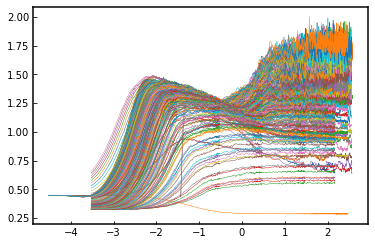

In [22]:
# Let's take the log of the data and find the minimum
logTime = []
logData = []
for i in xrange(nSweeps):
    logTime.append([])
    logData.append([])
    for j in xrange(len(fileContainer[i])):
        time = np.log10(all_sims[i][j]['Timestep'] / params[i]['brownTime'][j] * 3.0)
        data = np.log10(all_sims[i][j]['MCS'])
        logTime[i].append(time)
        logData[i].append(data)
        # Plot to make sure
        plt.plot(time, data)
plt.show()

In [23]:
# # Okay, now let's take the running slope (using index window bins)
# from scipy.stats import linregress
# # Total width of the moving slope window
# binSize = 50
# # Grab 5 values on either side of the center of the moving slope
# half = binSize / 2
# movSlop = []
# for i in xrange(nSweeps):
#     movSlop.append([])
#     for j in xrange(len(fileContainer[i])):
#         movSlop[i].append([])
#         for k in range(half, len(logData[i][j]) - half):
#             xs = logTime[i][j][k-half:k+half]
#             ys = logData[i][j][k-half:k+half]
#             reg = linregress(xs, ys)
#             m = reg[0]
#             movSlop[i][j].append(m)
#     print(i)
            
# # testX = np.arange(0, len(movSlop[0][9]))
# # plt.plot(testX, movSlop[0][9])
# # plt.title('Slope vs. Index')
# # plt.show()
# # indX = np.arange(0, len(logData[0][9]))
# # plt.plot(indX - half, logData[0][9])
# # plt.title('LogData vs. Index')
# # plt.show()
# # plt.plot(logTime[0][9], logData[0][9])
# # plt.title('LogData vs. LogTime')
# # plt.show()

In [24]:
# # This uses time window bins
# def getFirstLast(arr, middleInd, valueWidth):
#     '''
#         Read in array, center point, and bin width (by value): 
#         return the first and last indices of the window
#     '''
#     for k in range(middleInd - 50, len(arr)):
#         if arr[k] >= arr[middleInd] - valueWidth:
#             first = k
#             break
            
#     last = 0
#     for k in range(first, len(arr)):
#         if arr[k] >= arr[middleInd] + valueWidth:
#             last = k
#             break
            
#     if last == 0:
#         last = len(arr)
            
#     return [first, last]


# # Need to bin by time, not index (uses function, still slow... )
# from scipy.stats import linregress
# # The log(time) bin width
# binTime = 0.2
# half = binTime / 2
# movSlop = []
# for i in xrange(nSweeps):
#     print("Now on iteration: {}").format(i)
#     movSlop.append([])
#     for j in xrange(len(fileContainer[i])):
#         movSlop[i].append([])
#         for k in xrange(len(logTime[i][j])):
#             if 10**-1 <= logTime[i][j][k] <= 10**1:
#                 first, last = getFirstLast(logTime[i][j], k, half)
#                 xs = logTime[i][j][first:last]
#                 ys = logData[i][j][first:last]
#                 reg = linregress(xs, ys)
#                 m = reg[0]
#                 movSlop[i][j].append(m)
#             else:
#                 movSlop[i][j].append(0.0)
        
# testX = np.arange(0, len(movSlop[0][9]))
# plt.plot(testX, movSlop[0][9])
# plt.title('Slope vs. Index')
# plt.show()
# indX = np.arange(0, len(logData[0][9]))
# plt.plot(indX - half, logData[0][9])
# plt.title('LogData vs. Index')
# plt.show()
# plt.plot(logTime[0][9], logData[0][9])
# plt.title('LogData vs. LogTime')
# plt.show()

In [25]:
# This is slow garbage
# # The bin should be a width of log(time)... not index
# binTime = 1.0
# halfTime = binTime / 2.0
# # This is the range of times we're interested in
# startSim = 10**-1
# stopSim = 10**1

# # From the time I'll need to grab start and stop indices
# for i in xrange(nSweeps):
#     print("Now on iteration: {}").format(i)
#     movSlop.append([])
#     for j in xrange(len(fileContainer[i])):
#         movSlop[i].append([])
#         # This loops through each point that I want to get the slope around
#         for k in xrange(len(logData[i][j])):
#             # Default slope
#             slopey = 0
#             xs = []
#             ys = []
#             currentTime = (all_sims[i][j]['Timestep'][k] / params[i]['brownTime'][j] * 3.0)
#             if startSim <= currentTime <= stopSim:
#                 # Append all the data that I'll average over
#                 for m in range(k-50, k+50):
#                     # If we are within the time bin range
#                     if (logTime[i][j][k] - halfTime) < logTime[i][j][m] < (logTime[i][j][k] + halfTime):
#                         xs.append(logTime[i][j][m])
#                         ys.append(logData[i][j][m])
#                 # After we've gathered the x and y data
#                 reg = linregress(xs, ys)
#                 slopey = reg[0]
#             movSlop[i][j].append(slopey)
# print(movSlop)

In [26]:
# # Get tau_nuc when moving slope goes from negative to positive
# use = half
# # use = 5
# preHalf = []
# # Now we want the first index where we go from negative slope to positive
# for i in xrange(nSweeps):
#     print("Now on iteration: {}").format(i)
#     preHalf.append([])
#     for j in xrange(len(fileContainer[i])):
#         for k in xrange(len(movSlop[i][j])):
#             # Should go from negative slope
#             if movSlop[i][j][k] >= 0:
#                 # To positive slope
#                 if movSlop[i][j][k-1] <= 0:
#                     # This corrects for early-time identification mistakes
#                     if (all_sims[i][j]['Timestep'][k+use] / params[i]['brownTime'][j] * 3.0) >= 1.7*10**-1:
#                         preHalf[i].append(k + use)
#                         break
#             if k == len(movSlop[i][j]) - 1:
#                 preHalf[i].append(None)

In [27]:
# # Get tau_nuc by maximizing the difference between two consecutive moving slopes
# preHalf = []
# # Now we want the first index where we go from negative slope to positive
# for i in xrange(nSweeps):
#     print("Now on iteration: {}").format(i)
#     preHalf.append([])
#     for j in xrange(len(fileContainer[i])):
#         diffHold = 0.0
#         indHold = None
#         for k in xrange(len(movSlop[i][j])):
#             # This can't occur (spinodal decomp.) after 10tau
#             if (all_sims[i][j]['Timestep'][k+half] / params[i]['brownTime'][j] * 3.0) >= 10**1:
#                 break
#             # Should go from negative slope
#             if movSlop[i][j][k] >= 0:
#                 # To positive slope
#                 if movSlop[i][j][k-1] <= 0:
#                     # Has to happen after some set time
#                     if (all_sims[i][j]['Timestep'][k+half] / params[i]['brownTime'][j] * 3.0) >= 10**-1:
#                         # Find the difference in moveSlope
#                         diff = movSlop[i][j][k] - movSlop[i][j][k-1]
#                         if diff > diffHold:
#                             diffHold = diff
#                             indHold = k + half
#         preHalf[i].append(indHold)

In [28]:
# # Get tau_nuc for the direct index method (no index shift)
# preHalf = []
# # Now we want the first index where we go from negative slope to positive
# for i in xrange(nSweeps):
#     print("Now on iteration: {}").format(i)
#     preHalf.append([])
#     for j in xrange(len(fileContainer[i])):
#         diffHold = 0.0
#         indHold = None
#         for k in xrange(len(movSlop[i][j])):
#             # This can't occur (spinodal decomp.) after 10tau
#             if (all_sims[i][j]['Timestep'][Ak] / params[i]['brownTime'][j] * 3.0) >= 10**1:
#                 break
#             # Should go from negative slope
#             if movSlop[i][j][k] >= 0:
#                 # To positive slope
#                 if movSlop[i][j][k-1] <= 0:
#                     # Has to happen after some set time
#                     if (all_sims[i][j]['Timestep'][k] / params[i]['brownTime'][j] * 3.0) >= 10**-1:
#                         # Find the difference in moveSlope
#                         diff = movSlop[i][j][k] - movSlop[i][j][k-1]
#                         if diff > diffHold:
#                             diffHold = diff
#                             indHold = k
#         preHalf[i].append(indHold)

In [29]:
# # Let's plot and take a look
# for i in xrange(nSweeps):
#     for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
#             # Some inputs are none
#             if preHalf[i][j]:
#                 plt.scatter(params[i]['theoryDenom'][j],
#                             all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
#                             c=plt.cm.jet(params[i]['peR'][j]),
#                             label=params[i]['peR'][j])
# plt.xlabel(r'Net activity')
# plt.ylabel(r'Nucleation time')
# plt.xlim(50,500)
# # plt.ylim(1.7*10**-1, 10**2)
# plt.loglog()
# # plt.semilogy()
# plt.show()

Text(0,0.5,'MCS')

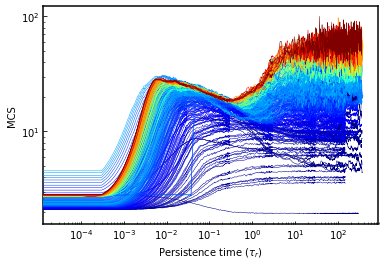

In [30]:
# Plot all lines, order by steady-state value
# Let's fit a line to the MCS
def lineFit(x, power, shift):
    return (x**power)/shift

noPlot = [0.0, 0.1, 0.2]
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['MCS'][:],
                 c=plt.cm.jet(params[i]['peA'][j]/500.0),
                 label=str(params[i]['peA'][j]/500.0),
                 zorder=int(all_SS[i]['MCS'][j]))

# # Plot the fit line
# xfit = np.arange(8, 90, 0.001)
# yfit = np.zeros_like(xfit)
# for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.0, 0.014)
# plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')

# # Second line
# xfit = np.arange(0.8, 5.5, 0.001)
# yfit = np.zeros_like(xfit)
# for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], 0.5, 0.035)
# plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')

# Plot text for first line
# ax = plt.gca()
# plt.text(0.27, 0.68, r'$\tau_{r}^{1/2}$', fontsize=18, transform=ax.transAxes, zorder=1001)
# plt.text(0.75, 0.9, r'$\tau_{r}^{0}$', fontsize=18, transform=ax.transAxes, zorder=1001)
# plt.text(0.45, 1.05, r'$\tau_{r}\approx 7$', fontsize=18, transform=ax.transAxes)
# plt.axvline(7.0, lw=1.5, linestyle='--', c='k', zorder=1000)
            
ax = plt.gca()
ax.loglog()
# plt.xlim(3*10**-1, 10**2)
# plt.ylim(8.5*10**0, 10**2)
plt.xlabel(r'Persistence time $(\tau_{r})$')
plt.ylabel(r'MCS')

Now on iteration: 0


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:2445: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


Now on iteration: 1
Now on iteration: 2
Now on iteration: 3
Now on iteration: 0
Now on iteration: 1
Now on iteration: 2
Now on iteration: 3


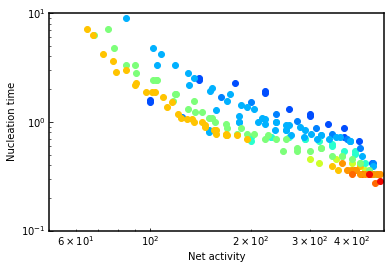

In [31]:
# Let's use bisection to do this
from bisect import bisect_left, bisect_right
# Width of the time bin
# binTime = 0.15 # this one is no good
# binTime = 0.2
# binTime = 0.25 # maybe the best?
# binTime = 0.3  # also maybe the best?
# binTime = 0.35
binTime = 0.4 # best fit :) 
# Okay, now let's take the running slope (using time window bins)
from scipy.stats import linregress
movSlop = []
indShift = []
for i in xrange(nSweeps):
    print("Now on iteration: {}").format(i)
    movSlop.append([])
    indShift.append([])
    for j in xrange(len(fileContainer[i])):
        movSlop[i].append([])
        startLoop = bisect_left( logTime[i][j], (logTime[i][j].iloc[0] + binTime) )
        stopLoop = bisect_right( logTime[i][j], (logTime[i][j].iloc[-1] - binTime) )
        indShift[i].append(startLoop)
        for k in range(startLoop, stopLoop):
            start = bisect_left( logTime[i][j], (logTime[i][j][k] - binTime) )
            stop = bisect_right( logTime[i][j], (logTime[i][j][k] + binTime) )
            xs = logTime[i][j][start:stop]
            ys = logData[i][j][start:stop]
            reg = linregress(xs, ys)
            m = reg[0]
            movSlop[i][j].append(m)

            
            
# Now let's find the min (first method) EDIT: THIS IDENTIFIES MINS MORE ACCURATELY
# Get tau_nuc when moving slope goes from negative to positive
preHalf = []
# Now we want the first index where we go from negative slope to positive
for i in xrange(nSweeps):
    print("Now on iteration: {}").format(i)
    preHalf.append([])
    for j in xrange(len(fileContainer[i])):
        shift = indShift[i][j]
        for k in xrange(len(movSlop[i][j])):
            # Should go from negative slope
            if movSlop[i][j][k] >= 0:
                # To positive slope
                if movSlop[i][j][k-1] <= 0:
                    # This corrects for early/late-time identification mistakes
                    if 10**-1 <= (all_sims[i][j]['Timestep'][k + shift] / params[i]['brownTime'][j] * 3.0) <= 10**1:
                        preHalf[i].append(k + shift)
                        break
            if k == len(movSlop[i][j]) - 1:
                preHalf[i].append(None)
                
                
# Let's plot and take a look
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
            # Some inputs are none
            if preHalf[i][j]:
                plt.scatter(params[i]['theoryDenom'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
plt.xlabel(r'Net activity')
plt.ylabel(r'Nucleation time')
plt.xlim(50,500)
plt.ylim(10**-1, 10**1)
plt.loglog()
# plt.semilogy()
plt.show()
                
                
# # Now let's find the min (second method, diff maximization) THIS METHOD IS ALWAYS WORSE       
# preHalf = []
# # Now we want the first index where we go from negative slope to positive
# for i in xrange(nSweeps):
#     print("Now on iteration: {}").format(i)
#     preHalf.append([])
#     for j in xrange(len(fileContainer[i])):
#         diffHold = 0.0
#         indHold = None
#         shift = indShift[i][j]
#         for k in xrange(len(movSlop[i][j])):
#             # This can't occur (spinodal decomp.) after 10tau
#             if (all_sims[i][j]['Timestep'][k+shift] / params[i]['brownTime'][j] * 3.0) >= 10**1:
#                 break
#             # Should go from negative slope
#             if movSlop[i][j][k] >= 0:
#                 # To positive slope
#                 if movSlop[i][j][k-1] <= 0:
#                     # Has to happen after some set time
#                     if (all_sims[i][j]['Timestep'][k+shift] / params[i]['brownTime'][j] * 3.0) >= 10**-1:
#                         # Find the difference in moveSlope
#                         diff = movSlop[i][j][k] - movSlop[i][j][k-1]
#                         if diff > diffHold:
#                             diffHold = diff
#                             indHold = k + shift
#         preHalf[i].append(indHold)
                
                
# # Let's plot and take a look
# for i in xrange(nSweeps):
#     for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
#             # Some inputs are none
#             if preHalf[i][j]:
#                 plt.scatter(params[i]['theoryDenom'][j],
#                             all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
#                             c=plt.cm.jet(params[i]['peR'][j]),
#                             label=params[i]['peR'][j])
# plt.xlabel(r'Net activity')
# plt.ylabel(r'Nucleation time')
# plt.xlim(50,500)
# # plt.ylim(1.7*10**-1, 10**2)
# plt.loglog()
# # plt.semilogy()
# plt.show()

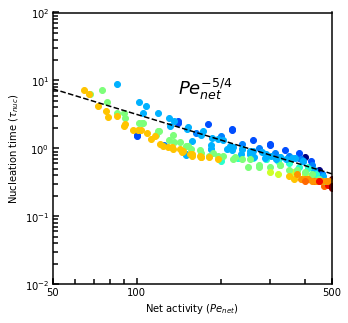

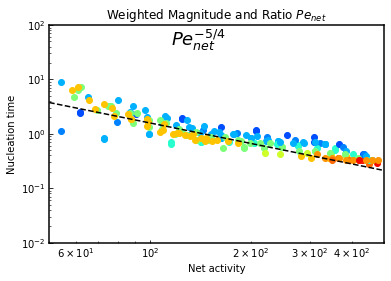

In [32]:
# Let's see if this can be reduced further
import matplotlib
def weightedNet(xF, PeS, PeF):
    xF /= 100.0
    xS = 1.0 - xF
    ratio = float(PeS) / PeF
    PeNet = ((xS*(ratio**0.6))+xF)*((xS*PeS) + (xF*PeF))
    return PeNet

# Plot original PeNet
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
        if params[i]['peR'][j] != 0.1:
            # Some inputs are none
            if preHalf[i][j]:
                ax.scatter(params[i]['theoryDenom'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
ax.set_xlabel(r'Net activity $(Pe_{net})$')
ax.set_ylabel(r'Nucleation time $(\tau_{nuc})$')
ax.set_xlim(50,500)
ax.set_ylim(10**-2, 10**2)
ax.loglog()
# ax.set_title(r'Weighted Magnitude $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.001)
ax.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
ax.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

# Set ticks for first plot
# ax.xaxis.set_major_locator(MultipleLocator(100))
# ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.yaxis.set_major_locator(MultipleLocator(20))
# ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xticks([50, 100, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
# ax.set_xticklabels(["50", "100", "500"])
# Set tick dims
ax.tick_params(which='major', length=6, width = 1.5)
ax.tick_params(which='minor', length=5, width = 1.5)

plt.show()

# Let's plot and take a look
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
            # Some inputs are none
            if preHalf[i][j]:
                plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
plt.xlabel(r'Net activity')
plt.ylabel(r'Nucleation time')
plt.xlim(50,500)
plt.ylim(10**-2, 10**2)
plt.loglog()
# plt.semilogy()
plt.title(r'Weighted Magnitude and Ratio $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.002)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
plt.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

plt.show()

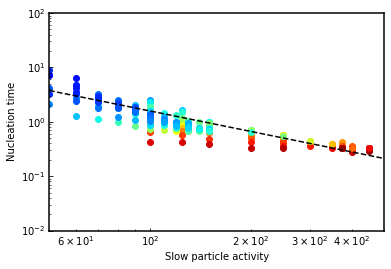

In [33]:
# Let's plot and take a look
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
            # Some inputs are none
            if preHalf[i][j]:
#                 plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
#                             all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
#                             c=plt.cm.jet(params[i]['peA'][j]/500.0),
#                             label=params[i]['peR'][j])
                plt.scatter(params[i]['peA'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['theoryDenom'][j]/500.0),
                            label=params[i]['peR'][j])
plt.xlabel(r'Slow particle activity')
plt.ylabel(r'Nucleation time')
plt.xlim(50,500)
plt.ylim(10**-2, 10**2)
plt.loglog()
# plt.semilogy()
# plt.title(r'Weighted Magnitude and Ratio $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.002)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
# plt.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

plt.show()

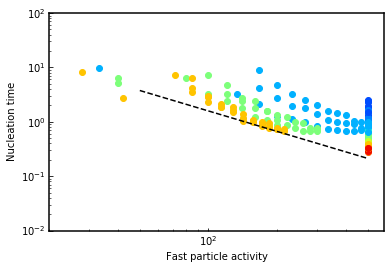

In [34]:
# Let's plot and take a look
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
            # Some inputs are none
            if preHalf[i][j]:
#                 plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
#                             all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
#                             c=plt.cm.jet(params[i]['peA'][j]/500.0),
#                             label=params[i]['peR'][j])
                plt.scatter(params[i]['peB'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
plt.xlabel(r'Fast particle activity')
plt.ylabel(r'Nucleation time')
# plt.xlim(50,500)
plt.ylim(10**-2, 10**2)
plt.loglog()
# plt.semilogy()
# plt.title(r'Weighted Magnitude and Ratio $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.002)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
# plt.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

plt.show()

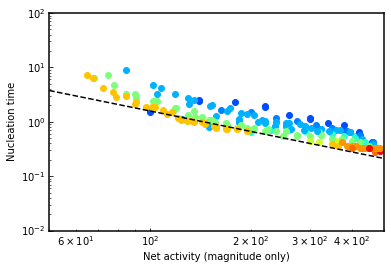

In [35]:
# Let's plot and take a look
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
            # Some inputs are none
            if preHalf[i][j]:
#                 plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
#                             all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
#                             c=plt.cm.jet(params[i]['peA'][j]/500.0),
#                             label=params[i]['peR'][j])
                plt.scatter(params[i]['theoryDenom'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
plt.xlabel(r'Net activity (magnitude only)')
plt.ylabel(r'Nucleation time')
plt.xlim(50,500)
plt.ylim(10**-2, 10**2)
plt.loglog()
# plt.semilogy()
# plt.title(r'Weighted Magnitude and Ratio $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.002)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
# plt.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

plt.show()

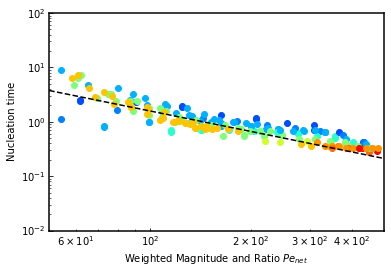

In [36]:
# Let's plot and take a look
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
            # Some inputs are none
            if preHalf[i][j]:
                plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
plt.xlabel(r'Weighted Magnitude and Ratio $Pe_{net}$')
plt.ylabel(r'Nucleation time')
plt.xlim(50,500)
plt.ylim(10**-2, 10**2)
plt.loglog()
# plt.semilogy()
# plt.title(r'Weighted Magnitude and Ratio $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.002)
plt.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
# plt.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

plt.show()

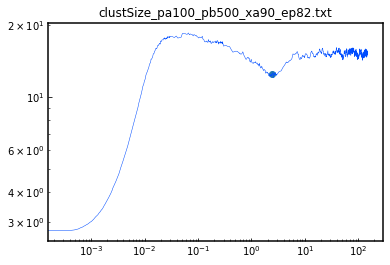

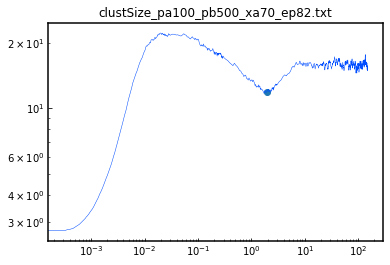

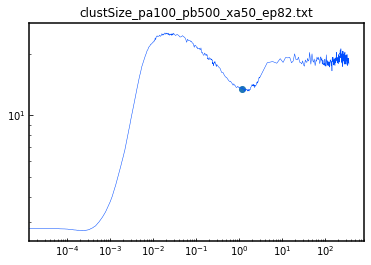

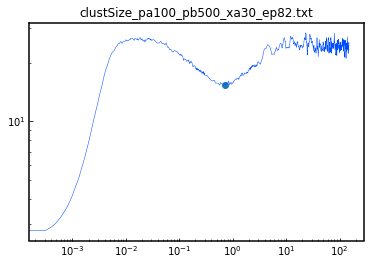

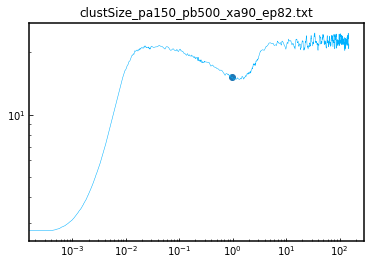

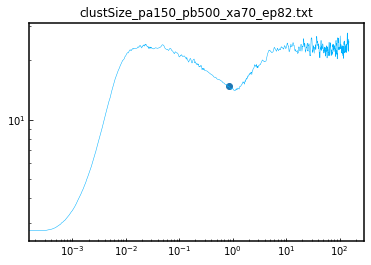

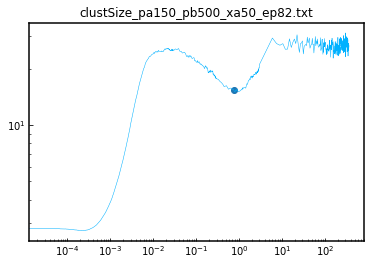

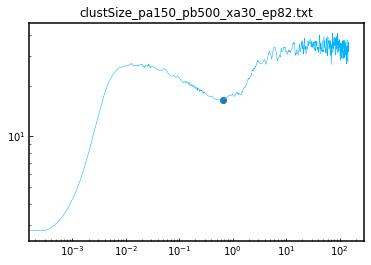

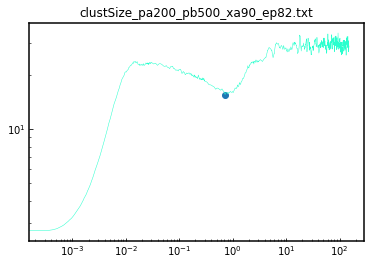

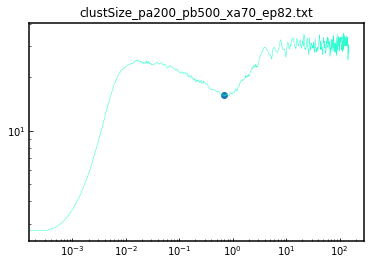

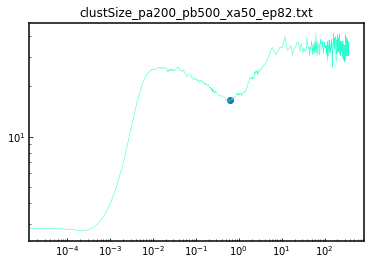

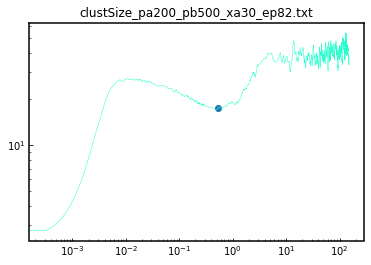

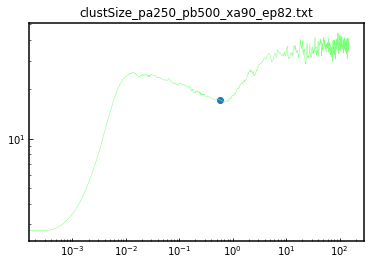

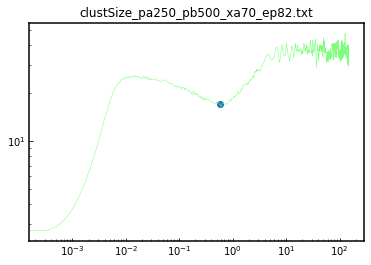

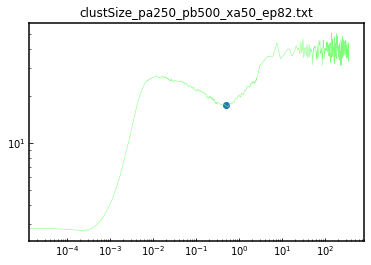

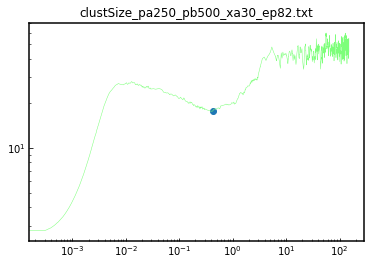

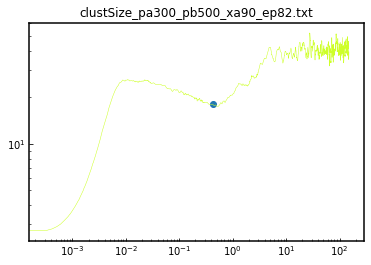

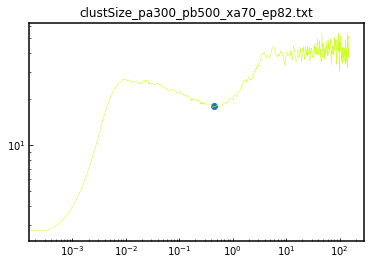

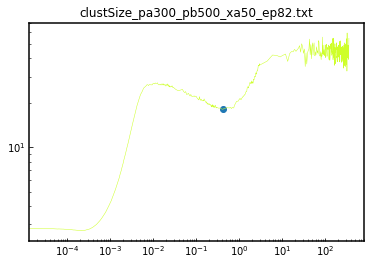

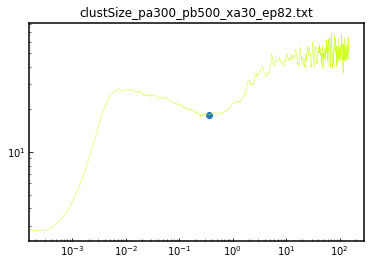

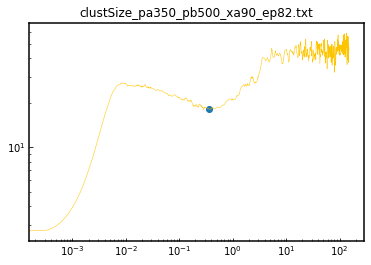

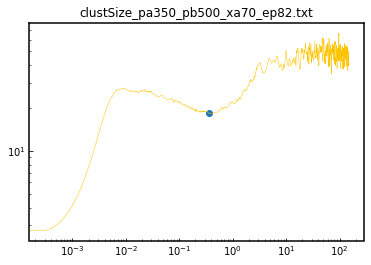

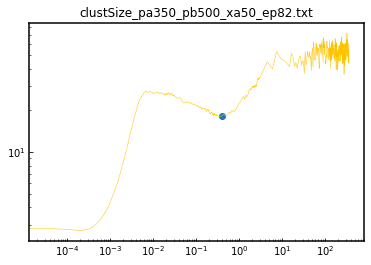

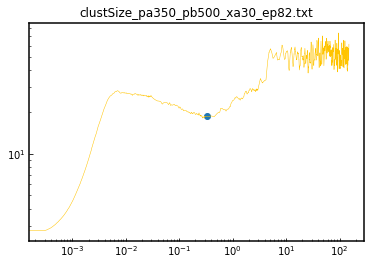

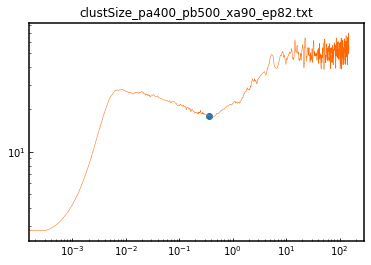

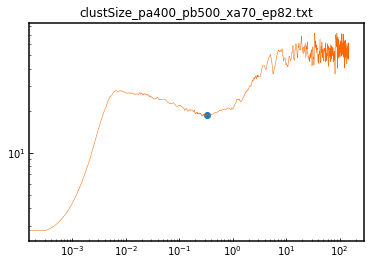

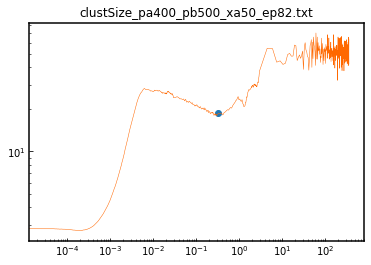

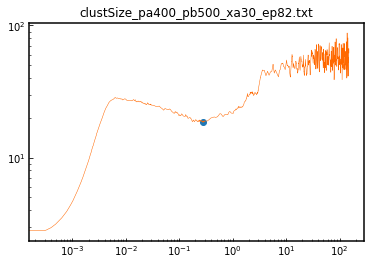

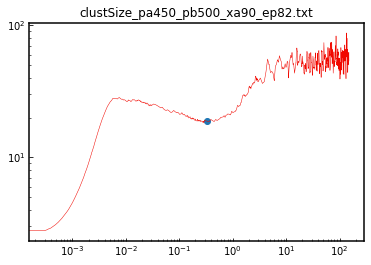

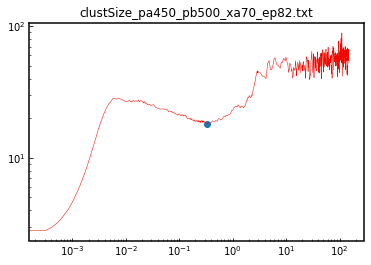

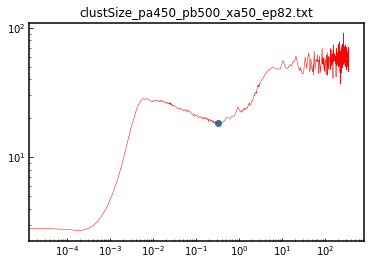

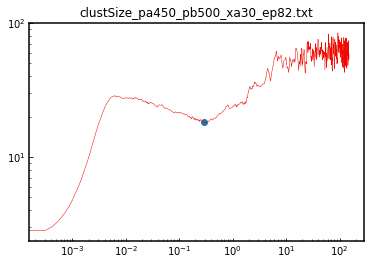

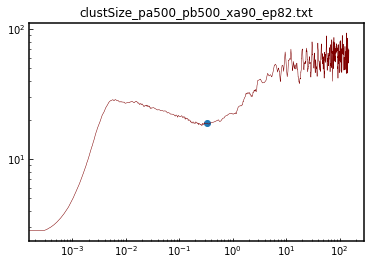

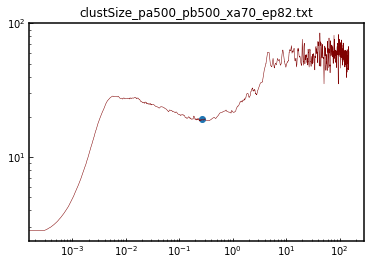

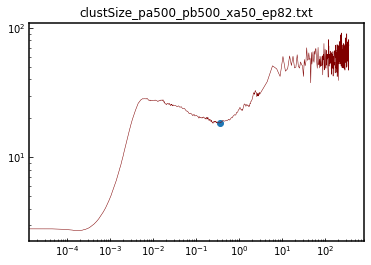

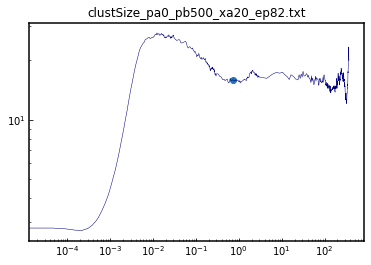

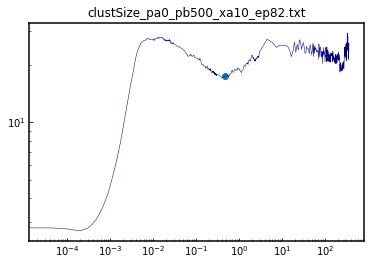

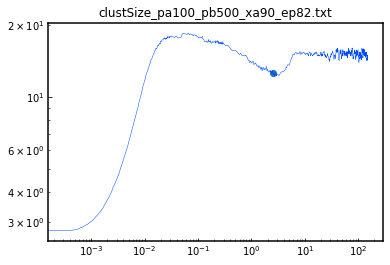

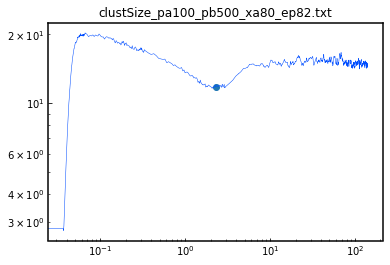

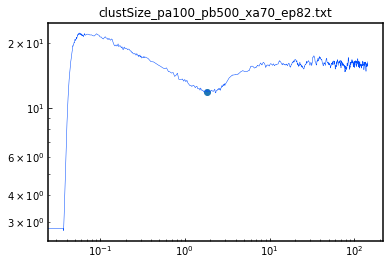

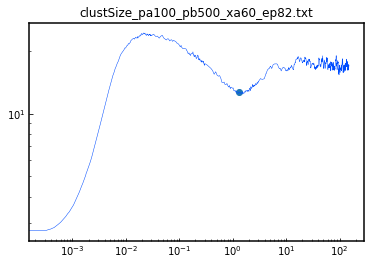

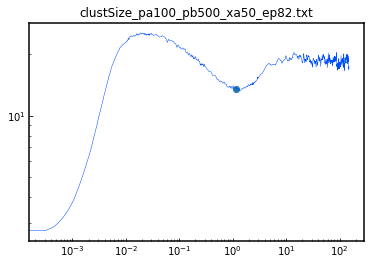

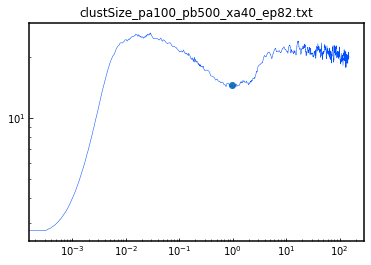

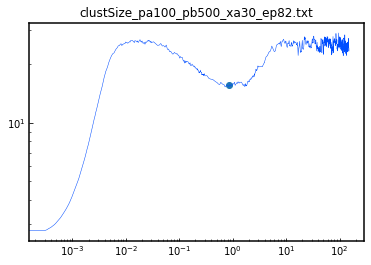

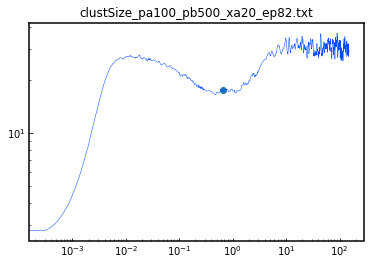

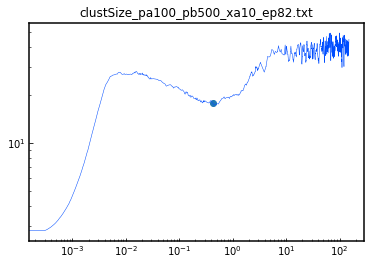

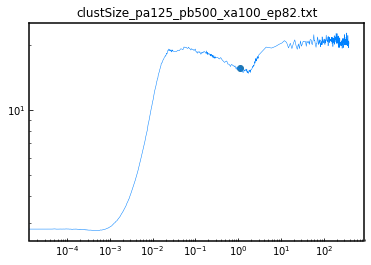

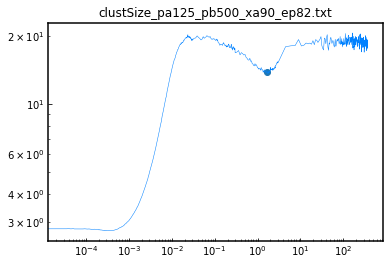

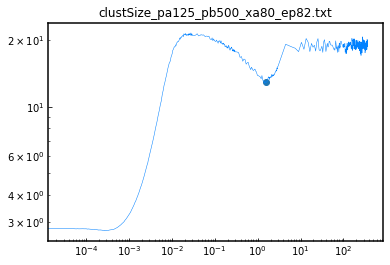

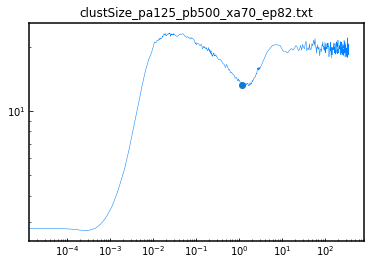

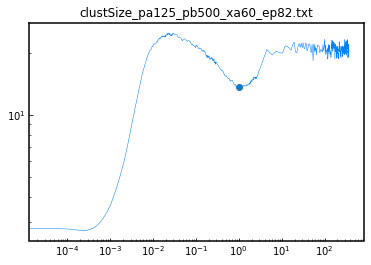

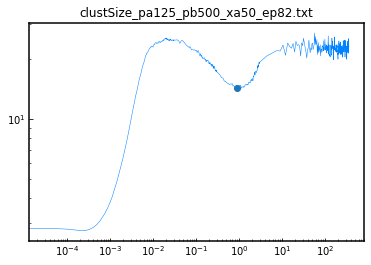

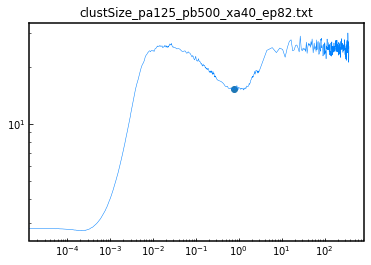

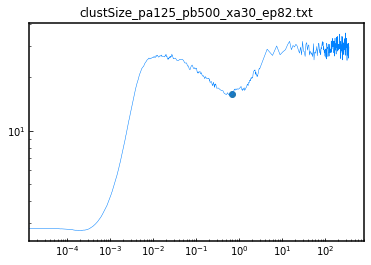

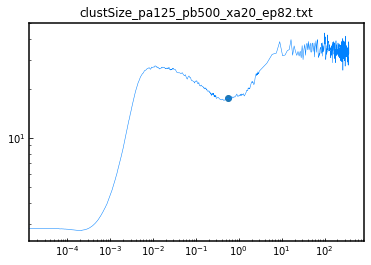

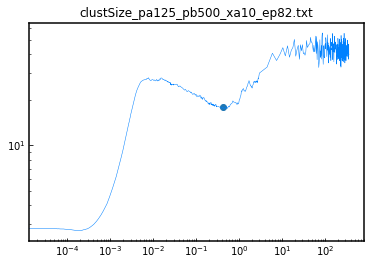

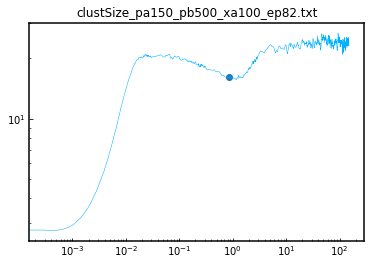

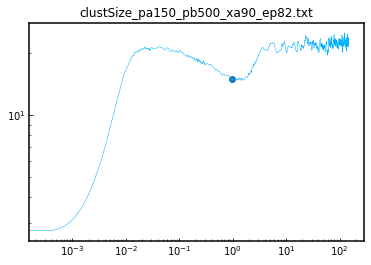

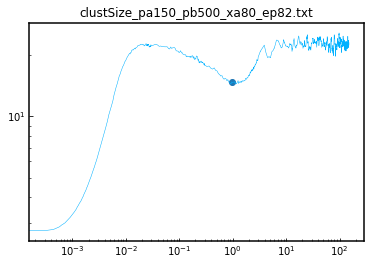

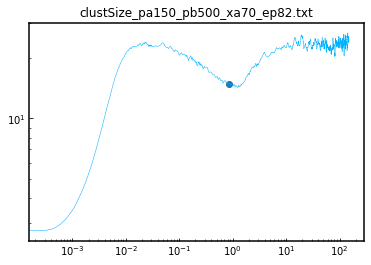

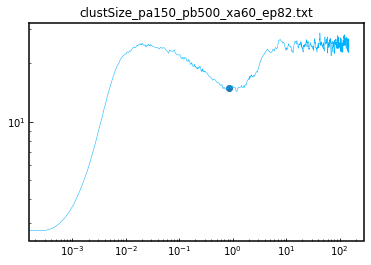

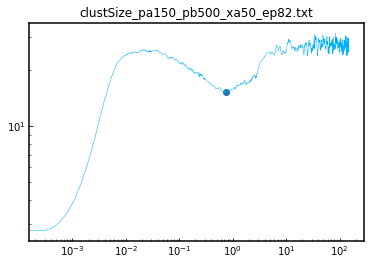

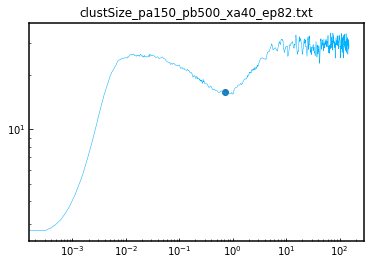

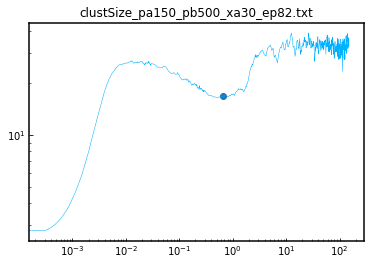

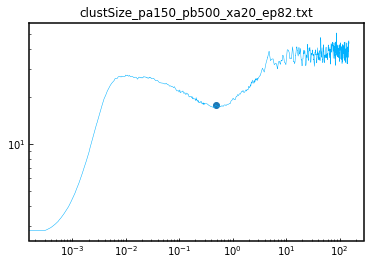

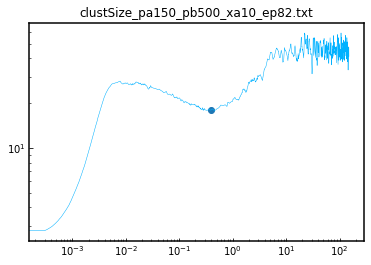

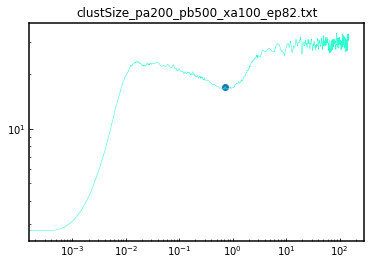

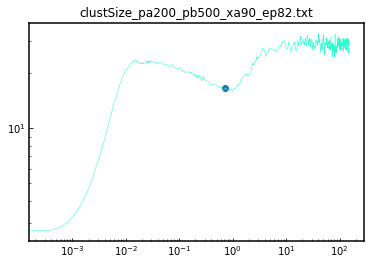

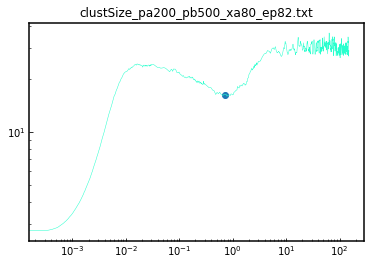

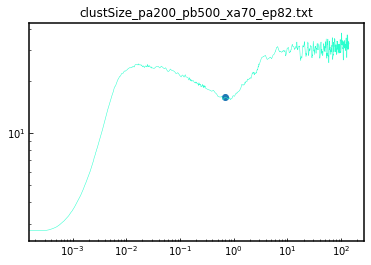

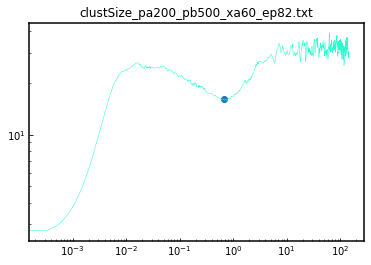

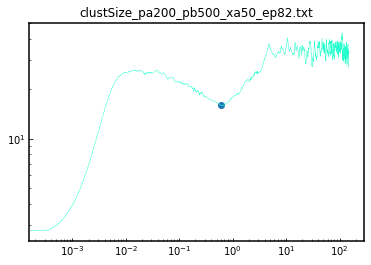

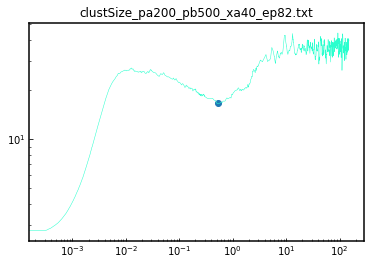

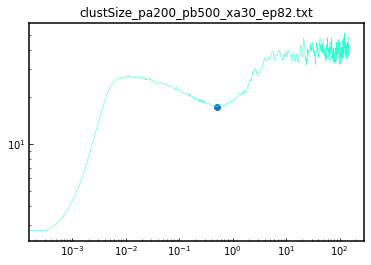

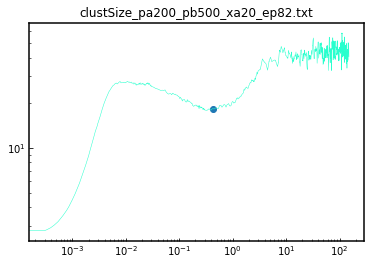

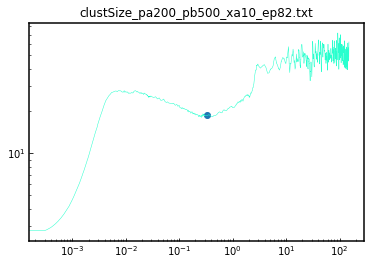

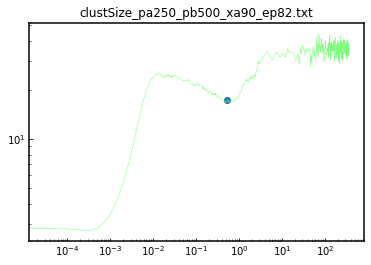

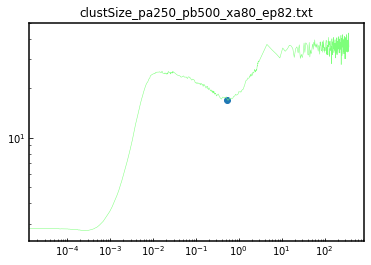

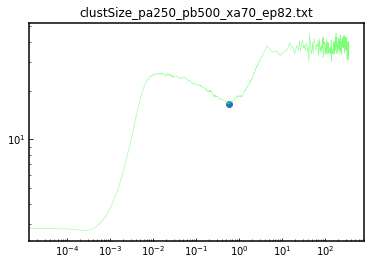

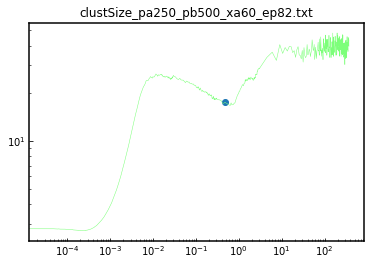

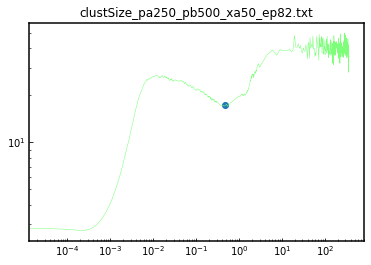

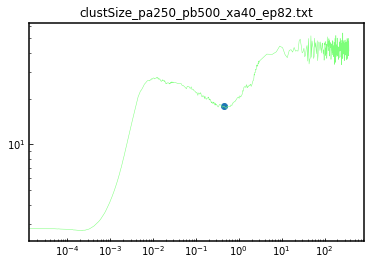

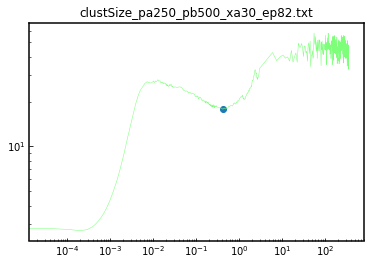

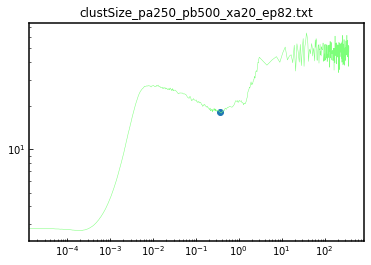

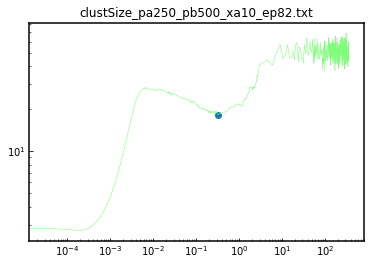

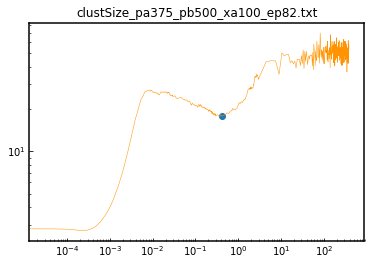

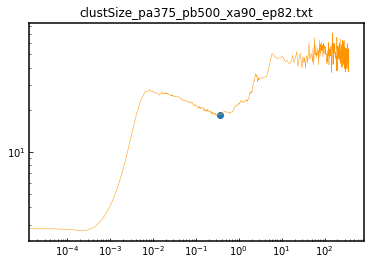

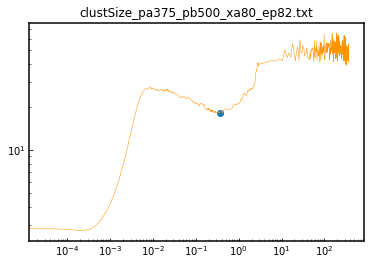

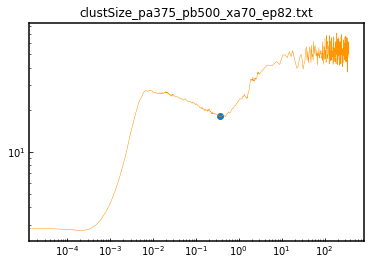

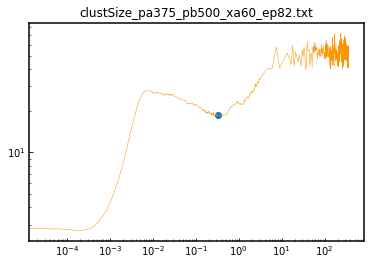

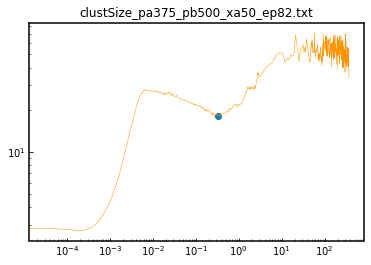

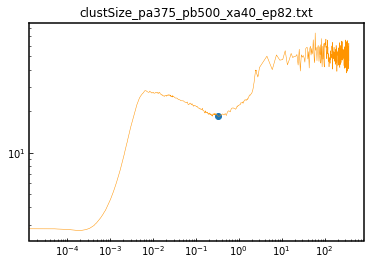

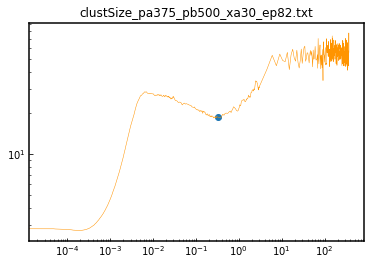

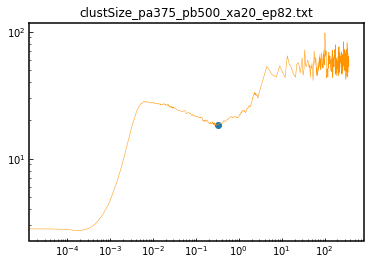

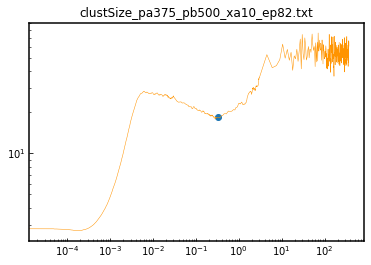

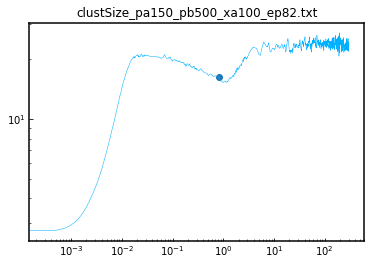

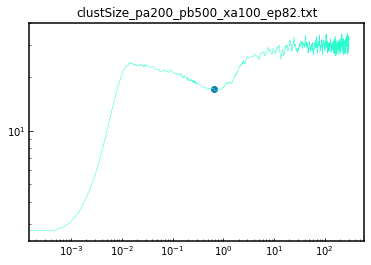

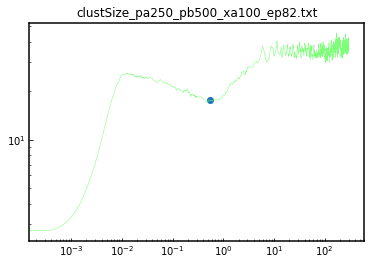

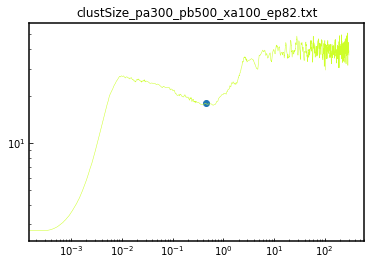

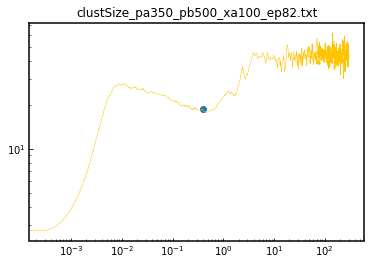

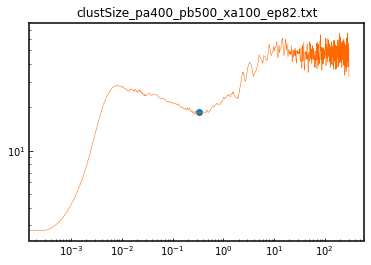

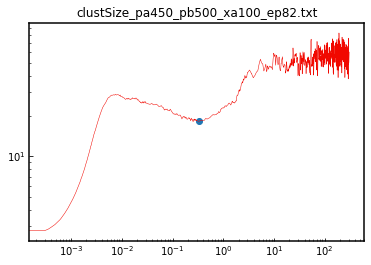

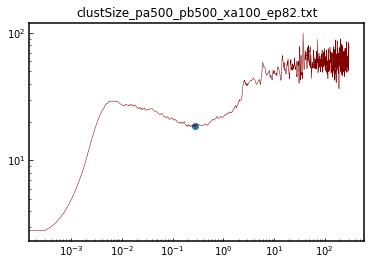

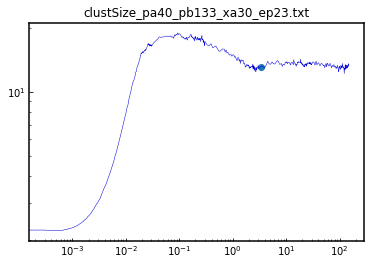

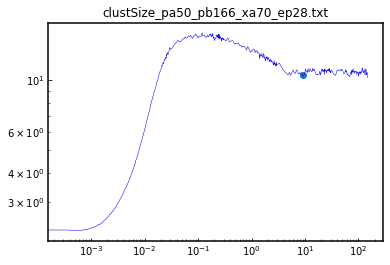

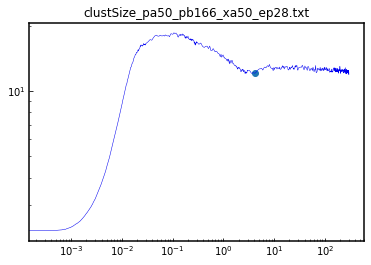

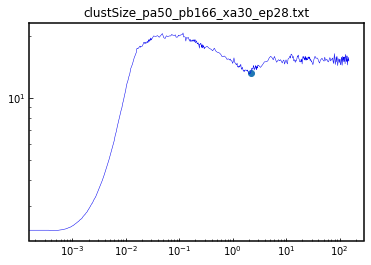

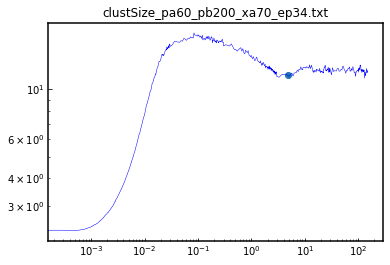

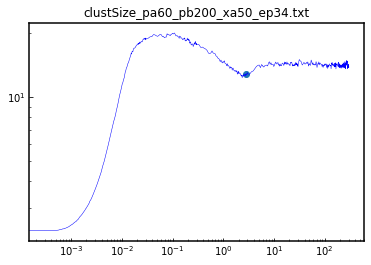

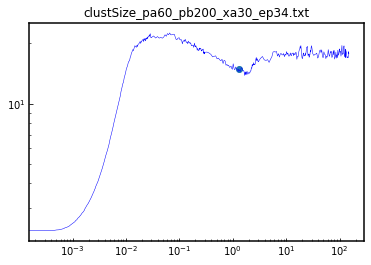

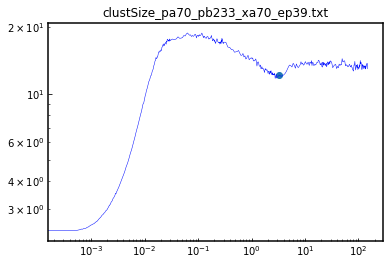

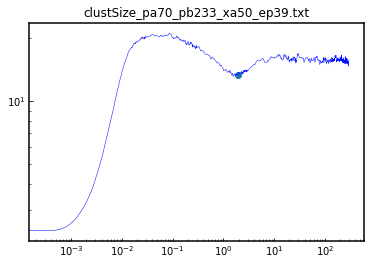

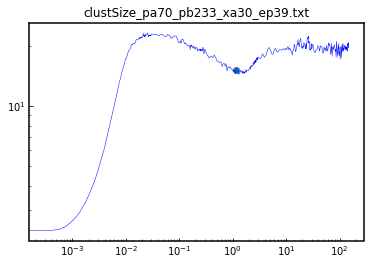

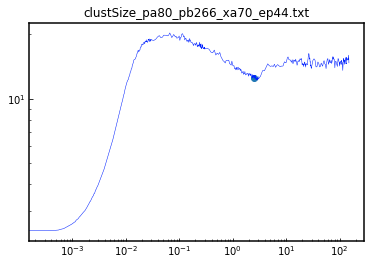

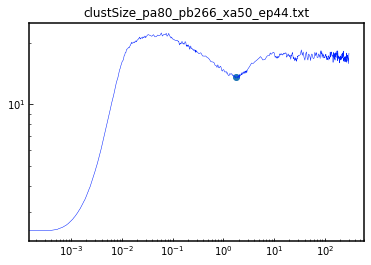

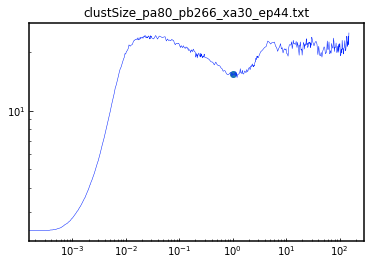

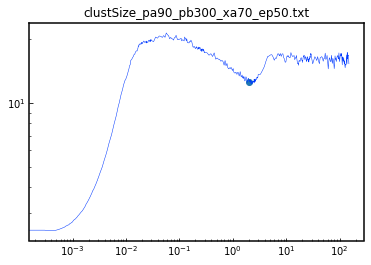

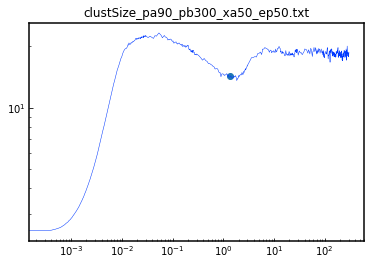

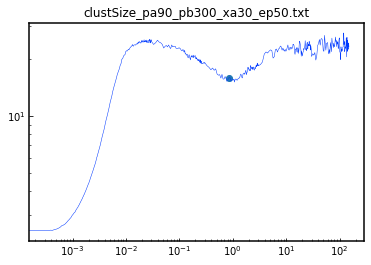

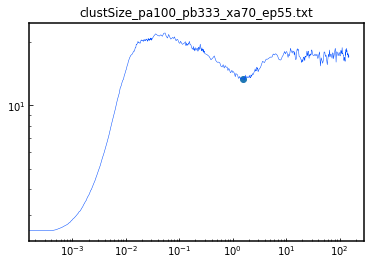

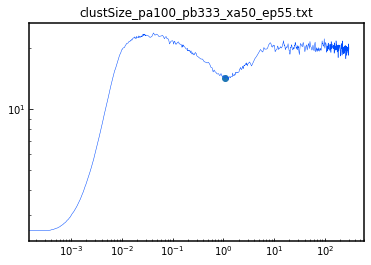

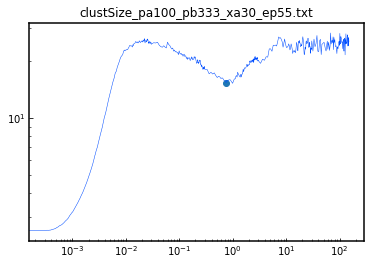

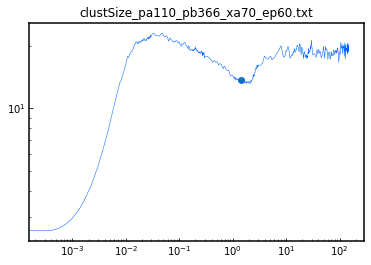

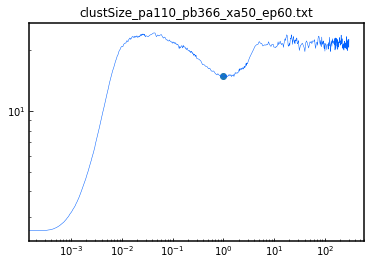

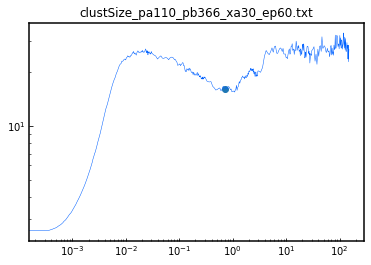

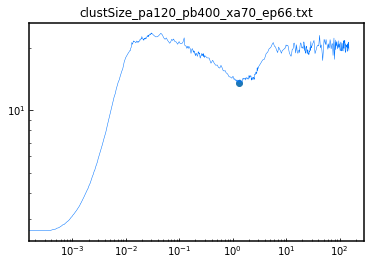

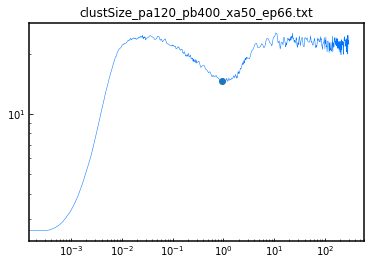

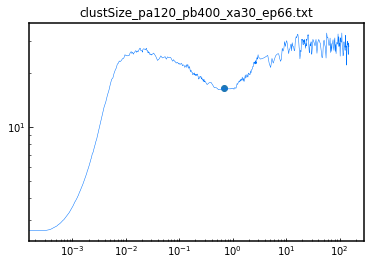

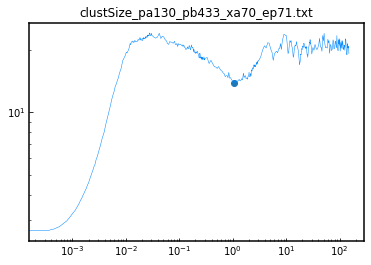

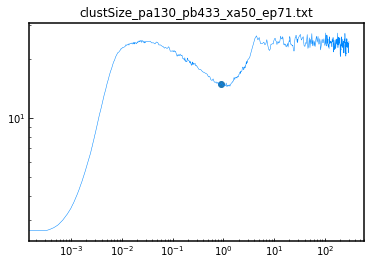

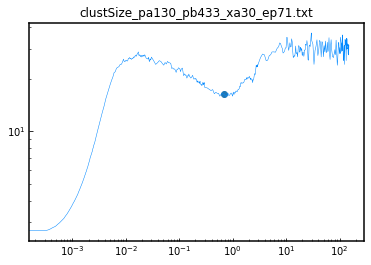

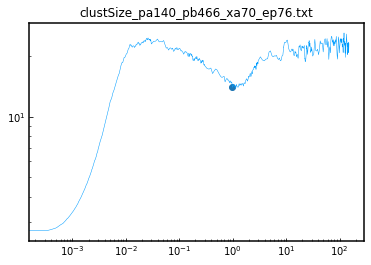

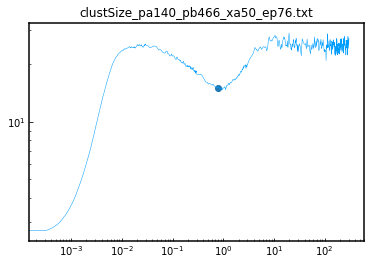

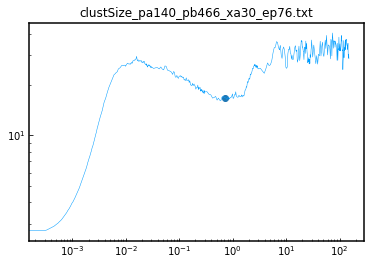

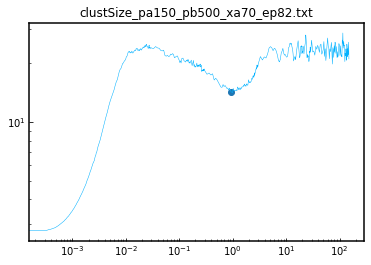

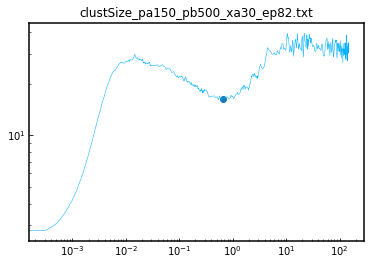

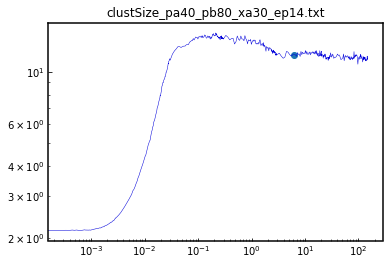

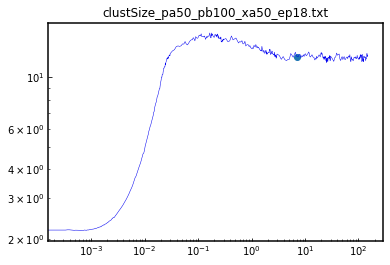

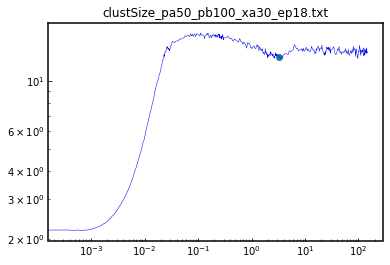

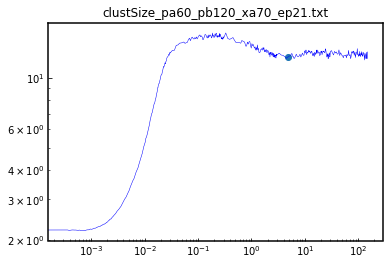

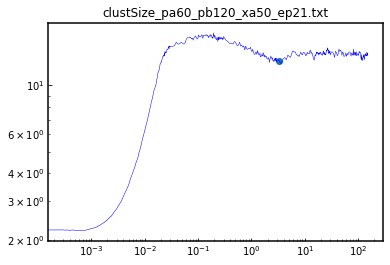

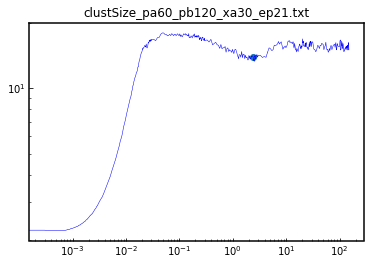

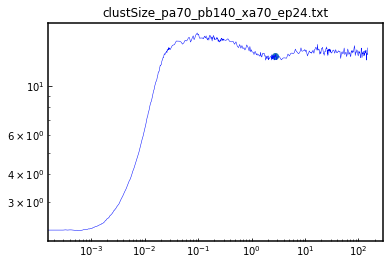

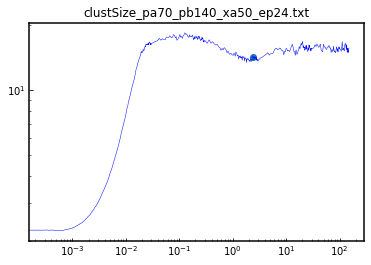

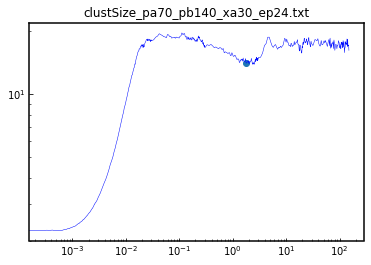

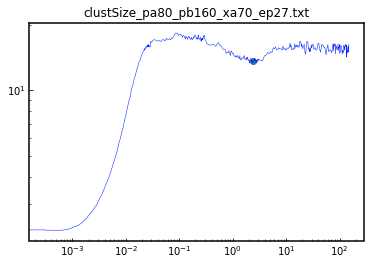

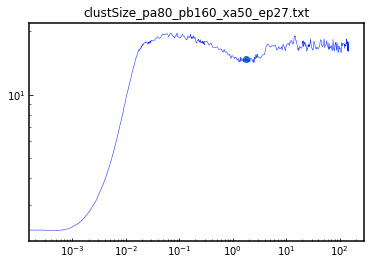

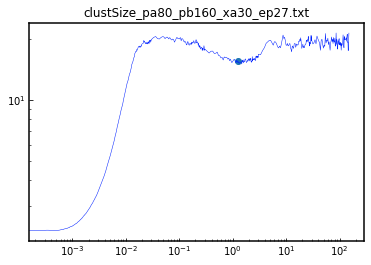

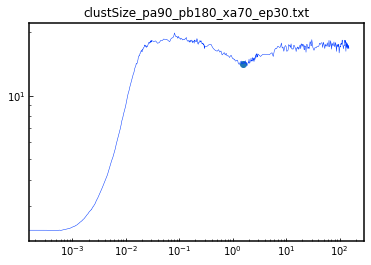

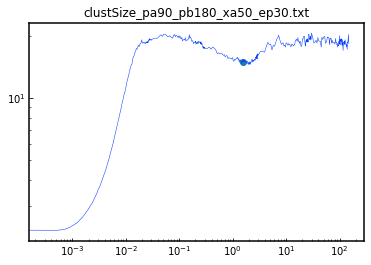

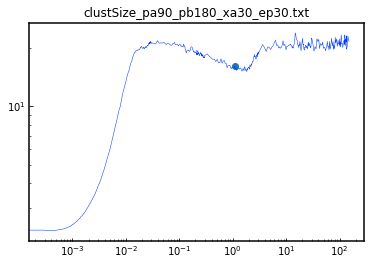

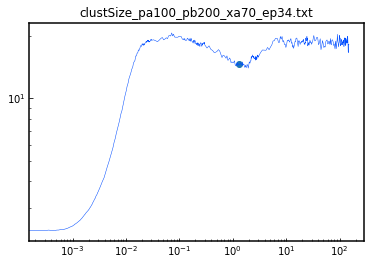

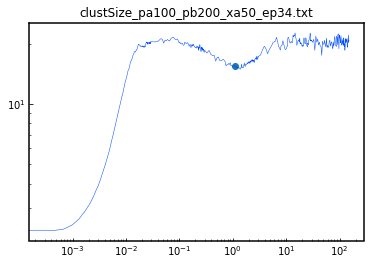

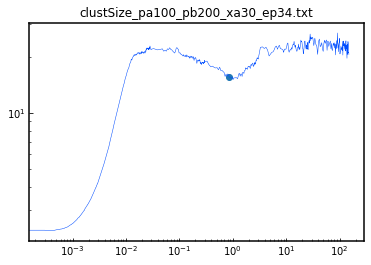

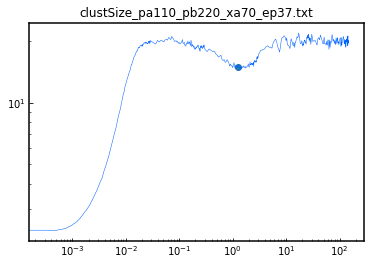

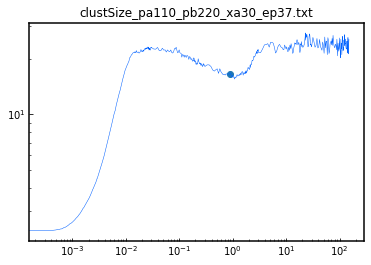

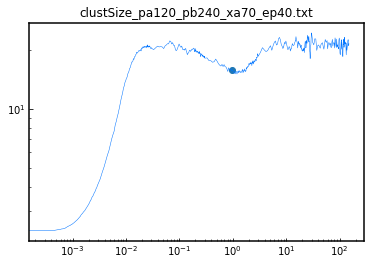

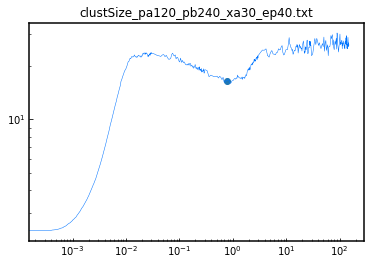

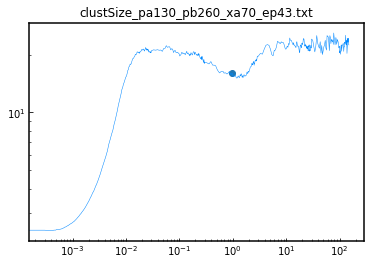

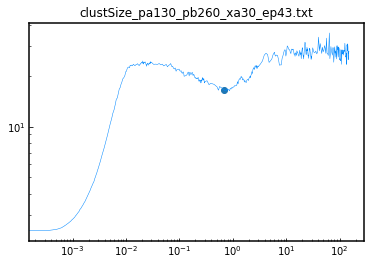

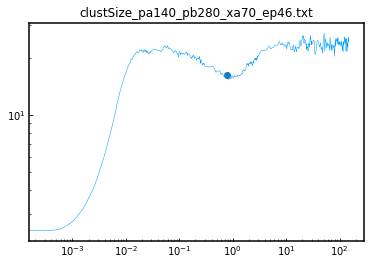

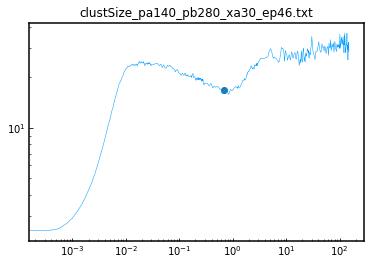

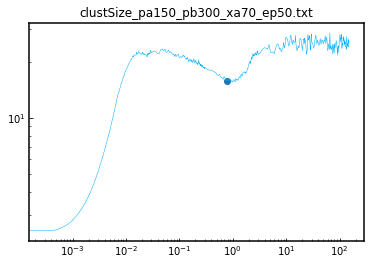

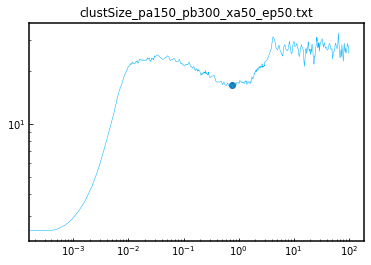

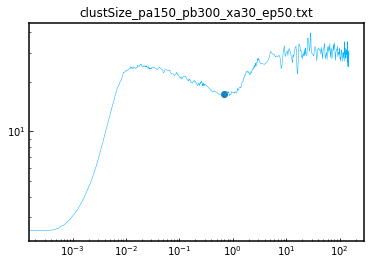

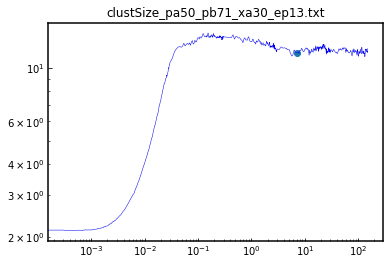

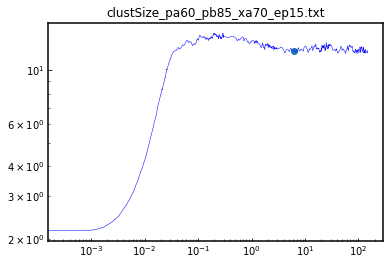

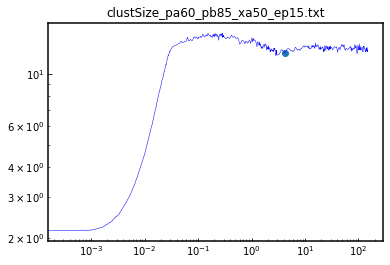

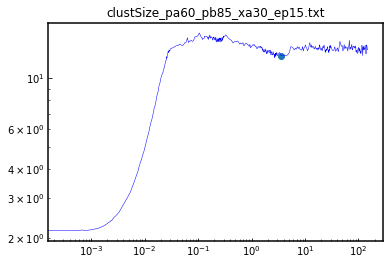

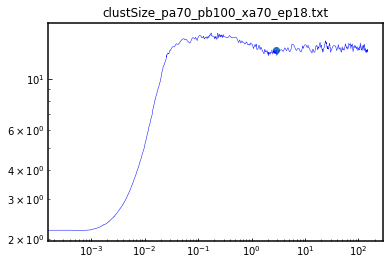

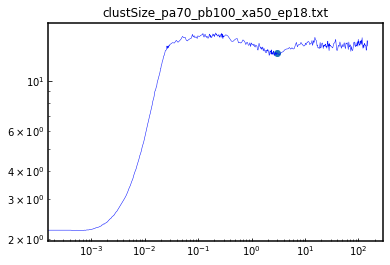

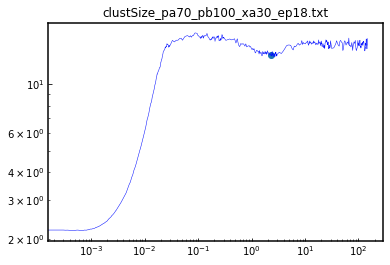

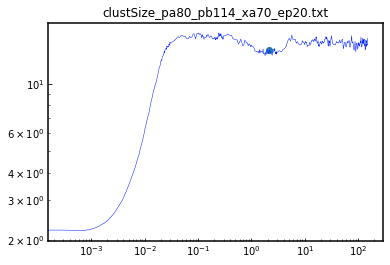

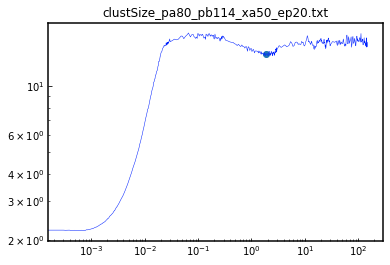

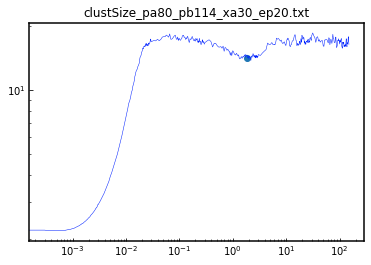

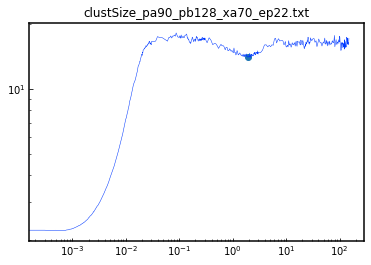

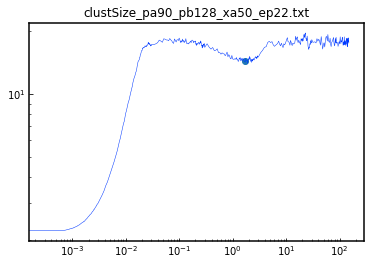

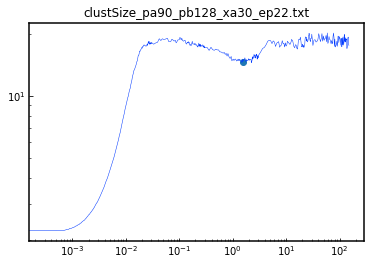

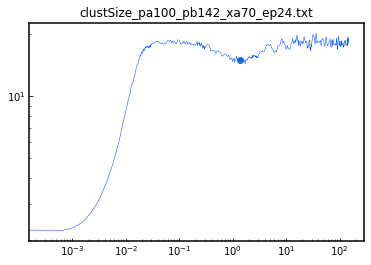

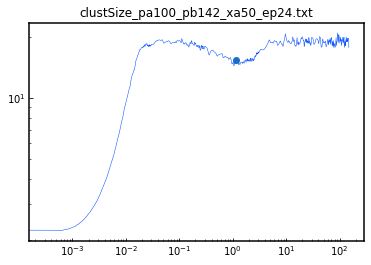

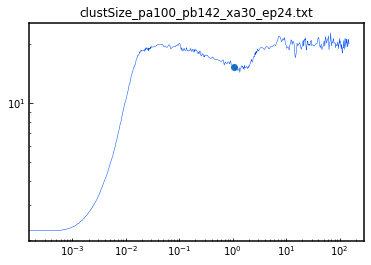

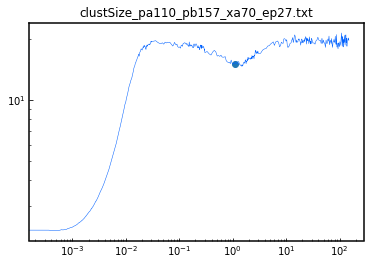

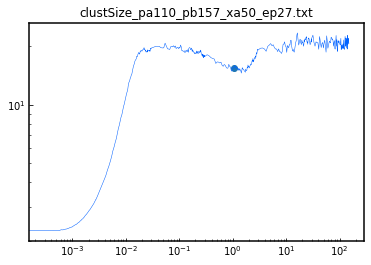

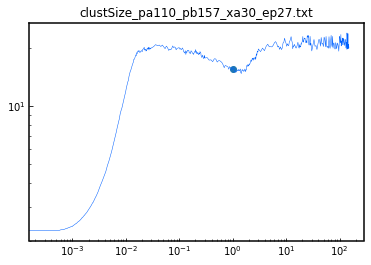

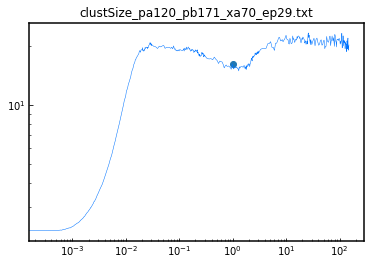

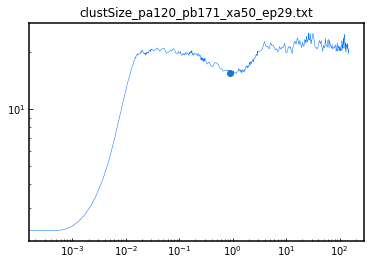

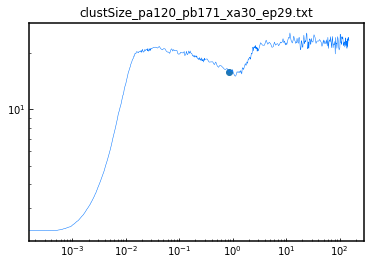

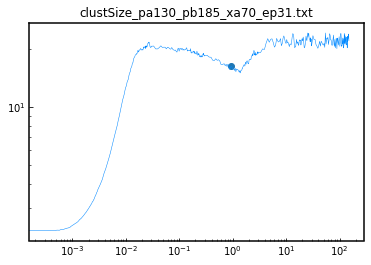

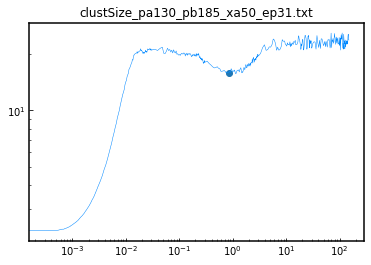

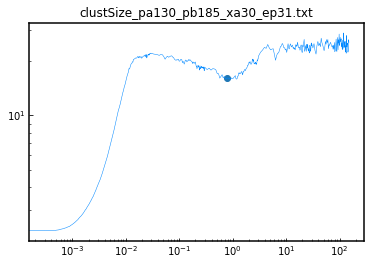

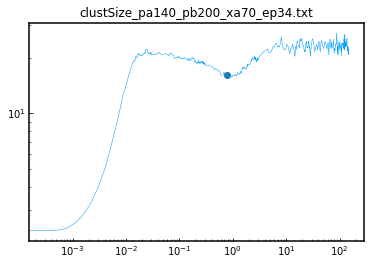

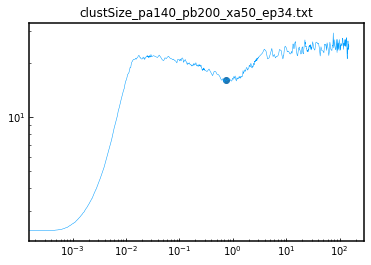

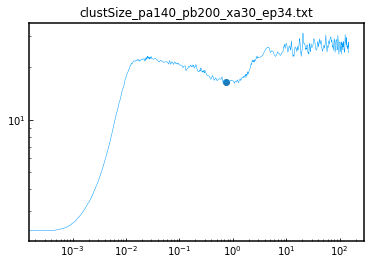

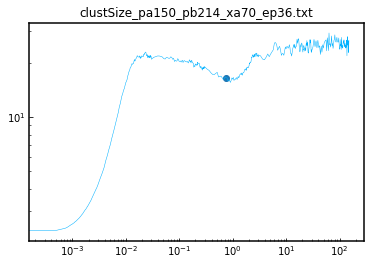

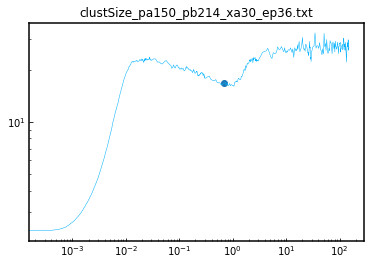

In [37]:
# Now I should make sure I'm picking appropriate minimum values
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] != 0.1 and preHalf[i][j] != None:
            if weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]) >= 50.0:
                plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                         all_sims[i][j]['MCS'][:],
                         c=plt.cm.jet(params[i]['peA'][j]/500.0),
                         label=str(params[i]['peA'][j]/500.0))
                plt.scatter(all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            all_sims[i][j]['MCS'][preHalf[i][j]])
                plt.loglog()
                plt.title(fileContainer[i][j])
                plt.show()

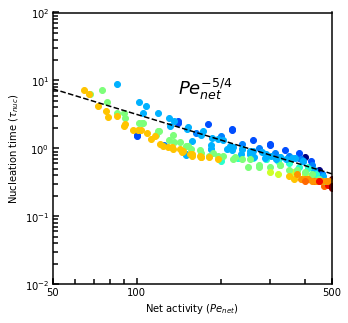

In [38]:
# Make figure of data
# Plot original PeNet
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
        if params[i]['peR'][j] != 0.1:
            # Some inputs are none
            if preHalf[i][j]:
                ax.scatter(params[i]['theoryDenom'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
ax.set_xlabel(r'Net activity $(Pe_{net})$')
ax.set_ylabel(r'Nucleation time $(\tau_{nuc})$')
ax.set_xlim(50,500)
ax.set_ylim(10**-2, 10**2)
ax.loglog()
# ax.set_title(r'Weighted Magnitude $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.001)
ax.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
ax.text(0.45, 0.7, r'$Pe_{net}^{-5/4}$', fontsize=18, transform=ax.transAxes)

# Set ticks for first plot
ax.set_xticks([50, 100, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
# Set tick dims
ax.tick_params(which='major', length=6, width = 1.5)
ax.tick_params(which='minor', length=5, width = 1.5)

plt.show()

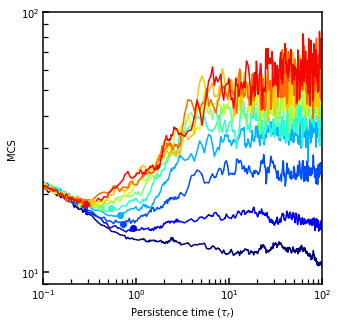

In [39]:
# Now let's show how we're grabbing this data
count = 0
i = 0
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for j in xrange(len(fileContainer[0])):
    if params[i]['xF'][j] == 70:
        ax.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['MCS'][:],
                 c=plt.cm.jet(params[i]['peA'][j]/500.0),
                 label=str(params[i]['peR'][j]),
                 zorder=0, lw=1.5)
#         if params[i]['peR'][j] >= 0.2:
        if preHalf[i][j]:
            ax.scatter(all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                       all_sims[i][j]['MCS'][preHalf[i][j]],
                       c=plt.cm.jet(params[i]['peA'][j]/500.0))

ax.set_xlim(10**-1, 10**2)
ax.set_ylim(9, 100)
ax.set_xlabel(r'Persistence time $(\tau_{r})$')
ax.set_ylabel(r'MCS')
ax.loglog()
# Set tick dims
ax.tick_params(which='major', length=6, width = 1.5)
ax.tick_params(which='minor', length=5, width = 1.25)
plt.show()
plt.close()

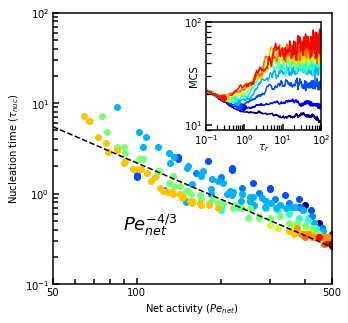

In [40]:
# Let's combine those previous two plots into a figure as an inset
# Make figure of data
# Plot original PeNet
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
        if params[i]['peR'][j] != 0.1:
            # Some inputs are none
            if preHalf[i][j]:
                ax.scatter(params[i]['theoryDenom'][j],
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
ax.set_xlabel(r'Net activity $(Pe_{net})$')
ax.set_ylabel(r'Nucleation time $(\tau_{nuc})$')
ax.set_xlim(50,500)
ax.set_ylim(10**-1, 10**2)
ax.loglog()
# ax.set_title(r'Weighted Magnitude $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.33, 0.001)
ax.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
ax.text(0.25, 0.2, r'$Pe_{net}^{-4/3}$', fontsize=18, transform=ax.transAxes)

# Set ticks for first plot
ax.set_xticks([50, 100, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
# Set tick dims
ax.tick_params(which='major', length=6, width = 1.5)
ax.tick_params(which='minor', length=5, width = 1.5)

# left, bottom, width, height = [0.26, 0.23, 0.25, 0.25]
left, bottom, width, height = [0.55, 0.555, 0.32, 0.30]
ax2 = fig.add_axes([left, bottom, width, height])

# Now let's show how we're grabbing this data
i = 0
for j in xrange(len(fileContainer[0])):
    if params[i]['xF'][j] == 70:
        ax2.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['MCS'][:],
                 c=plt.cm.jet(params[i]['peA'][j]/500.0),
                 label=str(params[i]['peR'][j]),
                 zorder=0, lw=1.5)
#         if params[i]['peR'][j] >= 0.2:
        if preHalf[i][j]:
            ax2.scatter(all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                       all_sims[i][j]['MCS'][preHalf[i][j]],
                       c=plt.cm.jet(params[i]['peA'][j]/500.0))

ax2.set_xlim(10**-1, 10**2)
ax2.set_ylim(9, 100)
ax2.set_xlabel(r'$\tau_{r}$', labelpad=-5)
ax2.set_ylabel(r'MCS', labelpad=-15)
ax2.loglog()
# Set tick dims
ax2.tick_params(which='major', length=6, width = 1.5)
ax2.tick_params(which='minor', length=5, width = 1.25)

plt.savefig('inset_time_collapse_mcs.pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0.02)

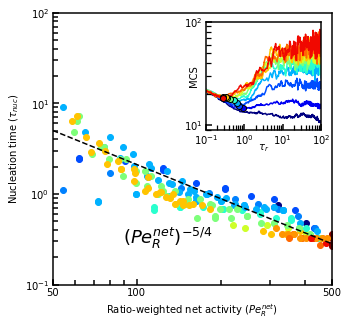

In [41]:
# Now plot the weighted net activity
# Let's combine those previous two plots into a figure as an inset
# Make figure of data
# Plot original PeNet
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
        if params[i]['peR'][j] != 0.1:
            # Some inputs are none
            if preHalf[i][j]:
                ax.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
                            all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                            c=plt.cm.jet(params[i]['peR'][j]),
                            label=params[i]['peR'][j])
ax.set_xlabel(r'Ratio-weighted net activity $(Pe_{R}^{net})$')
ax.set_ylabel(r'Nucleation time $(\tau_{nuc})$')
ax.set_xlim(50,500)
ax.set_ylim(10**-1, 10**2)
ax.loglog()
# ax.set_title(r'Weighted Magnitude $Pe_{net}$')

# Plot the fit line
xfit = np.arange(50, 500, 0.001)
yfit = np.zeros_like(xfit)
for i in xrange(len(xfit)): yfit[i] = lineFit(xfit[i], -1.25, 0.0015)
ax.plot(xfit, yfit, lw=1.5, zorder=1000, c='k', linestyle='--')
ax.text(0.25, 0.15, r'$(Pe_{R}^{net})^{-5/4}$', fontsize=18, transform=ax.transAxes)

# Set ticks for first plot
ax.set_xticks([50, 100, 500])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
# Set tick dims
ax.tick_params(which='major', length=6, width = 1.5)
ax.tick_params(which='minor', length=5, width = 1.5)

# left, bottom, width, height = [0.26, 0.23, 0.25, 0.25]
left, bottom, width, height = [0.55, 0.555, 0.32, 0.30]
ax2 = fig.add_axes([left, bottom, width, height])

# Now let's show how we're grabbing this data
i = 0
for j in xrange(len(fileContainer[0])):
    if params[i]['xF'][j] == 70:
        ax2.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 all_sims[i][j]['MCS'][:],
                 c=plt.cm.jet(params[i]['peA'][j]/500.0),
                 label=str(params[i]['peR'][j]),
                 zorder=0, lw=1.5)
#         if params[i]['peR'][j] >= 0.2:
        if preHalf[i][j]:
            ax2.scatter(all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0,
                       all_sims[i][j]['MCS'][preHalf[i][j]],
                       c=plt.cm.jet(params[i]['peA'][j]/500.0),
                       edgecolor='k'
                       )

ax2.set_xlim(10**-1, 10**2)
ax2.set_ylim(9, 100)
ax2.set_xlabel(r'$\tau_{r}$', labelpad=-5)
ax2.set_ylabel(r'MCS', labelpad=-15)
ax2.loglog()
# Set tick dims
ax2.tick_params(which='major', length=6, width = 1.5)
ax2.tick_params(which='minor', length=5, width = 1.25)

plt.savefig('inset_time_collapse_mcs_weighted_net.pdf', dpi=1000, bbox_inches = 'tight', pad_inches = 0.02)

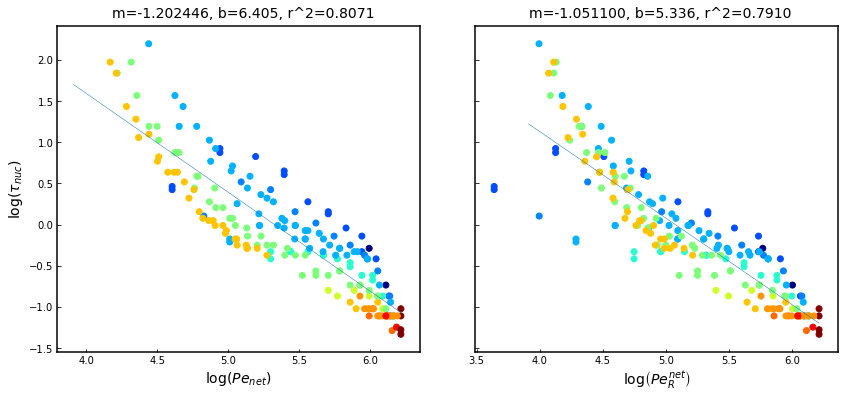

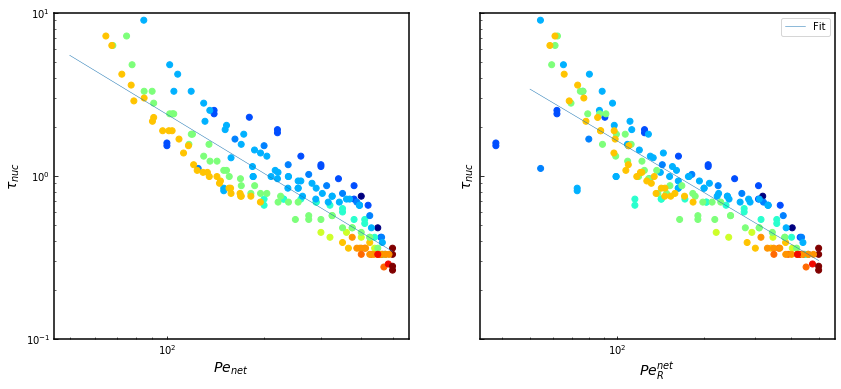

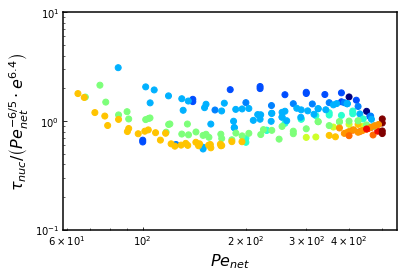

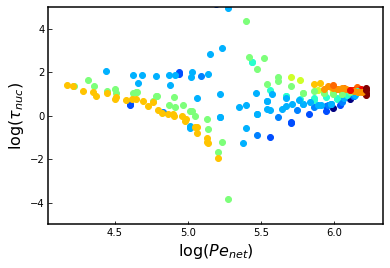

In [167]:
# Let's fit the MCS curve computationally
def plotLine(x, m, b):
    '''Basic line'''
    return (m*x) + b

def plotPow(x, m, b):
    '''Power law for fit data'''
    return (x**m)*(np.exp(b))

def getRSquared(xdat, ydat, m, b):
    '''Get statistics of the fit'''
    # Compute the average y value
    avg = np.mean(ydat)
    real = 0.0
    pred = 0.0
    # Get the distance from real and predicted values to mean
    for i in xrange(len(ydat)):
        real += (ydat[i] - avg)**2
        pred += (plotLine(xdat[i], m, b) - avg)**2
    return pred / real

# Get the data for fitting
peNfit = []
peNRfit = []
taufit = []
peRfit = []
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
#         if params[i]['peR'][j] >= 0.2 and params[i]['peR'][j] != 1.0:
        if params[i]['peR'][j] != 0.1 and params[i]['theoryDenom'][j] >= 50:
            # Some inputs are none
            if preHalf[i][j]:
#                 if np.log(params[i]['theoryDenom'][j]) > 4:
                peNfit.append(params[i]['theoryDenom'][j])
                peNRfit.append(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]))
                taufit.append(all_sims[i][j]['Timestep'][preHalf[i][j]] / params[i]['brownTime'][j] * 3.0)
                peRfit.append(params[i]['peR'][j])
                
# Get the ln of the data
peNLog = []
peNRLog = []
tauLog = []
for i in xrange(len(peNfit)):
    peNLog.append(np.log(peNfit[i]))
    peNRLog.append(np.log(peNRfit[i]))
    tauLog.append(np.log(taufit[i]))

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14, 6))
# Fits for the net activity vs ratio-weighted: linear scales
rangeDat = np.arange(np.log(50), np.log(500.), 0.000001)        
m, b = np.polyfit(peNLog, tauLog, 1)
res = getRSquared(peNLog, tauLog, m, b)
ax[0].plot(rangeDat, plotLine(rangeDat, m, b))
ax[0].scatter(peNLog, tauLog, c=peRfit, cmap='jet')
ax[0].set_xlabel(r'$\log\left(Pe_{net}\right)$', fontsize=14)
ax[0].set_ylabel(r'$\log\left(\tau_{nuc}\right)$', fontsize=14)
ax[0].text(-1., 1.025,'m={:.6f}, b={:.3f}, r^2={:.4f}'.format(m, b, res),
         fontsize=14, transform=plt.gca().transAxes)

# Try for the ratio-weighted net activity
m2, b2 = np.polyfit(peNRLog, tauLog, 1)
res = getRSquared(peNRLog, tauLog, m2, b2)
ax[1].plot(rangeDat, plotLine(rangeDat, m2, b2))
ax[1].scatter(peNRLog, tauLog, c=peRfit, cmap='jet')
ax[1].set_xlabel(r'$\log\left(Pe_{R}^{net}\right)$', fontsize=14)
ax[1].text(0.15, 1.025,'m={:.6f}, b={:.3f}, r^2={:.4f}'.format(m2, b2, res),
         fontsize=14, transform=plt.gca().transAxes)
plt.subplots_adjust(wspace=0.15)
plt.show()

# Log scales
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(14, 6))
ax[0].scatter(peNfit, taufit, c=peRfit, cmap='jet')
rangeRaw = np.arange(50., 500., 0.001)
ax[0].plot(rangeRaw, plotPow(rangeRaw, m, b), label='Fit')
# plt.plot(rangeRaw, plotPow(rangeRaw, (1./8.), b), label='2D-Ising')
ax[0].set_xlabel(r'$Pe_{net}$', fontsize=14)
ax[0].set_ylabel(r'$\tau_{nuc}$', fontsize=14)
# plt.legend()
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].scatter(peNRfit, taufit, c=peRfit, cmap='jet')
rangeRaw = np.arange(50., 500., 0.001)
ax[1].plot(rangeRaw, plotPow(rangeRaw, m2, b2), label='Fit')
# plt.plot(rangeRaw, plotPow(rangeRaw, (1./8.), b), label='2D-Ising')
ax[1].set_xlabel(r'$Pe_{R}^{net}$', fontsize=14)
ax[1].set_ylabel(r'$\tau_{nuc}$', fontsize=14)
ax[1].legend()
ax[1].set_xscale('log')
ax[1].set_yscale('log')
# plt.xlim(50, 500)
ax[1].set_ylim(10**-1, 10.)
plt.show()

# Divide data by scaling, how well does it fit?
# plt.scatter(peNfit, taufit / plotPow(peNfit, m, b),  c=peRfit, cmap='jet')
# plt.ylim(-2, 4)
# plt.xlabel(r'$Pe_{net}$')
# plt.ylabel(r'$\tau_{nuc}$')
# plt.show()

plt.scatter(peNfit, taufit / plotPow(peNfit, m, b),  c=peRfit, cmap='jet')
plt.ylim(10**-1, 10.)
plt.xlabel(r'$Pe_{net}$', fontsize=16)
plt.ylabel(r'$\tau_{nuc}/\left( Pe_{net}^{-6/5} \cdot e^{6.4} \right)$', fontsize=16)
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

for i in xrange(len(peNfit)):
    plt.scatter(peNLog[i], tauLog[i] / plotLine(peNLog[i], m, b),  c=plt.cm.jet(peRfit[i]))
plt.xlabel(r'$\log\left(Pe_{net}\right)$', fontsize=16)
plt.ylabel(r'$\log\left(\tau_{nuc}\right)$', fontsize=16)
plt.ylim(-5, 5)
plt.show()

# for i in xrange(len(peNfit)):
#     plt.scatter(peNLog[i], tauLog[i] / plotLine(peNLog[i], m, b),  c=plt.cm.jet(peRfit[i]))
# plt.xlabel(r'$\log\left(Pe_{net}\right)$')
# plt.ylabel(r'$\log\left(\tau_{nuc}\right)$')
# plt.ylim(10**-2, 100.)
# ax = plt.gca()
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.show()


In [145]:
# Fit each set of constant PeR data
uniPeR = []
for i in xrange(len(peRfit)):
    if peRfit[i] not in uniPeR:
        uniPeR.append(peRfit[i])
print(uniPeR)

# Force the exponent (slope)
fExp = -6/5
for i in xrange(len(uniPeR)):
    fitX = []
    fitY = []
    for j in xrange(len(peNfit)):
        if peRfit[j] == uniPeR[i]:
            fitX.append(peNfit[j])
            fitY.append(taufit[j])
            
    # Now we have the set of PeR data, fit it
    m, b = np.polyfit(np.log(fitX), np.log(fitY), 1)
    res = getRSquared(np.log(fitX), np.log(fitY), m, b)
    
            

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.0, 0.25, 0.75]


In [42]:
# Function for fit from other file
def fplat(x, a, b):
    # a: the plateau y-value of the curve
    # b: the steepness of the curve (lower=steeper)
    return (a * x) / (b + x)

Cgt1000_A


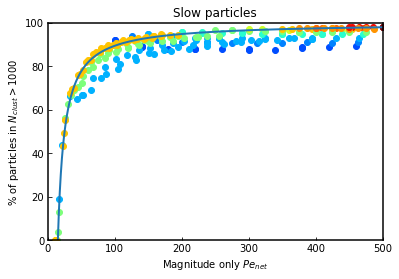

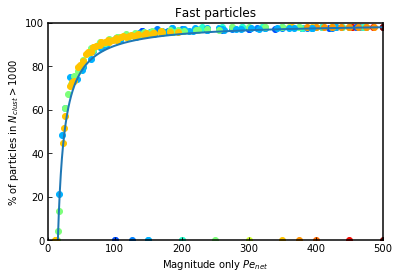

In [43]:
# Let's sum together all the cluster data that is > 100 particles
Clustgt1A = []
Clustgt1B = []

# Column indices that I'll want to sum over
colA = np.arange(14, 16, 2)
colB = np.arange(15, 17, 2)

# print(list(all_SS[0]))
print(list(all_SS[0])[colA[0]])
# print(list(all_SS[0])[9])

# This sums all clusters greater than 100 by type
for i in xrange(nSweeps):
    Clustgt1A.append([])
    Clustgt1B.append([])
    for j in xrange(len(fileContainer[i])):
        Clustgt1A[i].append(0)
        Clustgt1B[i].append(0)
        for k in xrange(len(colA)):
            Clustgt1A[i][j] += all_SS[i].iloc[j, colA[k]]
            Clustgt1B[i][j] += all_SS[i].iloc[j, colB[k]]
            
# Plot the fit
evalX = np.arange(0.0, 600.0, 0.01)
evalY = np.zeros_like(evalX)
critNetAct = 15
for i in xrange(len(evalX)):
    evalY[i] = fplat(evalX[i], 100.0, 10.0)
    evalX[i] += critNetAct
plt.plot(evalX, evalY, lw=2)
# Plot the data
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2:
            plt.scatter(params[i]['theoryDenom'][j],
                        Clustgt1A[i][j],c=plt.cm.jet(params[i]['peR'][j]))
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.title(r'Slow particles')
plt.xlabel(r'Magnitude only $Pe_{net}$')
plt.ylabel(r'% of particles in $N_{clust}>1000$')
plt.show()

# Overlay the fit
plt.plot(evalX, evalY, lw=2)
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2:
            plt.scatter(params[i]['theoryDenom'][j],
                        Clustgt1B[i][j],c=plt.cm.jet(params[i]['peR'][j]))
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.title(r'Fast particles')
plt.xlabel(r'Magnitude only $Pe_{net}$')
plt.ylabel(r'% of particles in $N_{clust}>1000$')
plt.show()
        

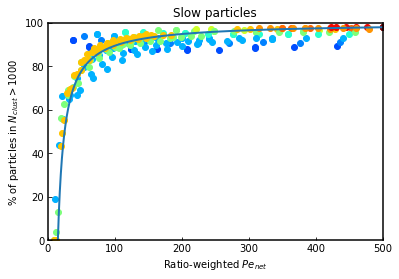

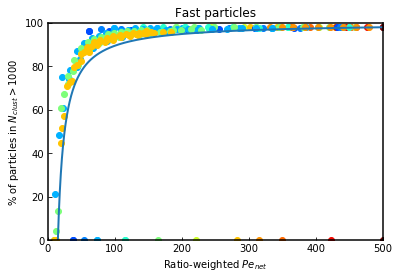

In [44]:
# Plot with weighted-ratio net activity
# weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j])
            
# Plot the fit
evalX = np.arange(0.0, 600.0, 0.01)
evalY = np.zeros_like(evalX)
critNetAct = 15
for i in xrange(len(evalX)):
    evalY[i] = fplat(evalX[i], 100.0, 10.0)
    evalX[i] += critNetAct
plt.plot(evalX, evalY, lw=2)
# Plot the data
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2:
            plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
                        Clustgt1A[i][j],c=plt.cm.jet(params[i]['peR'][j]))
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.title(r'Slow particles')
plt.xlabel(r'Ratio-weighted $Pe_{net}$')
plt.ylabel(r'% of particles in $N_{clust}>1000$')
plt.show()

# Overlay the fit
plt.plot(evalX, evalY, lw=2)
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        if params[i]['peR'][j] >= 0.2:
            plt.scatter(weightedNet(params[i]['xF'][j], params[i]['peA'][j], params[i]['peB'][j]),
                        Clustgt1B[i][j],c=plt.cm.jet(params[i]['peR'][j]))
plt.xlim(0, 500)
plt.ylim(0, 100)
plt.title(r'Fast particles')
plt.xlabel(r'Ratio-weighted $Pe_{net}$')
plt.ylabel(r'% of particles in $N_{clust}>1000$')
plt.show()
        

In [45]:
# # Here is the plot script
# mysz=5.0

# linesX = []
# linesY = []
# linesY2 = []
# plotPER = [0.3, 0.5, 0.7]
# plotXF = [0.3, 0.5, 0.7]
# for g in xrange(len(plotPER)):
#     linesX.append([])
#     linesY.append([])
#     linesY2.append([])
#     for h in xrange(len(plotXF)):
#         linesX[g].append([])
#         linesY[g].append([])
#         linesY2[g].append([])
#         for i in xrange(nSweeps):
#             for j in xrange(len(fileContainer[i])):
#                 if params[i]['peR'][j] == plotPER[g] and params[i]['xF'][j]/100.0 == plotXF[h]:
                    
#                     myYA = enhance[i][j] - all_stdDev[i]['Dense_A'][j]
#                     if myYA < 0:
#                         myYA = 0
                        
#                     myYB = suppress[i][j] + all_stdDev[i]['Dense_B'][j]
#                     if myYB > 0:
#                         myYB = 0
                        
#                     linesX[g][h].append(params[i]['peA'][j])
#                     if myYA != 0:
#                         linesY[g][h].append(enhance[i][j])
#                     else:
#                         linesY[g][h].append(None)
                        
#                     if myYB != 0:
#                         linesY2[g][h].append(suppress[i][j])
#                     else:
#                         linesY2[g][h].append(None)
# # Now we plot as lines?
# mylw = 1.1
# for g in xrange(len(plotPER)):
#     for h in xrange(len(plotXF)):
#         plt.plot(linesX[g][h], linesY[g][h], marker=getShape(plotXF[h]),
#                  color=plt.cm.jet(plotPER[g]),
#                  markersize=mysz,
#                  markerfacecolor='w',
#                  markeredgecolor=plt.cm.jet(plotPER[g]),
#                  markeredgewidth=1.1,
#                  linewidth=mylw)
#         plt.plot(linesX[g][h], linesY2[g][h], marker=getShape(plotXF[h]),
#                  color=plt.cm.jet(plotPER[g]),
#                  markersize=mysz,
#                  markerfacecolor='w',
#                  markeredgecolor=plt.cm.jet(plotPER[g]),
#                  markeredgewidth=1.1,
#                  linewidth=mylw)

# plt.xlabel(r'Slow activity $(Pe_{s})$')
# plt.ylabel(r'$\% Dense_{mix} - \% Dense_{mono}$')
# plt.xlim(0, 150)

# ax = plt.gca()
# ax.xaxis.set_major_locator(MultipleLocator(100))
# ax.xaxis.set_minor_locator(MultipleLocator(50))
# ax.yaxis.set_major_locator(MultipleLocator(20))
# ax.yaxis.set_minor_locator(MultipleLocator(10))
# ax.tick_params(which='major', length=6, width = 1.5)
# ax.tick_params(which='minor', length=5, width = 1.5)

In [46]:
# Let's make the dynamic figure

(0, 0.01)

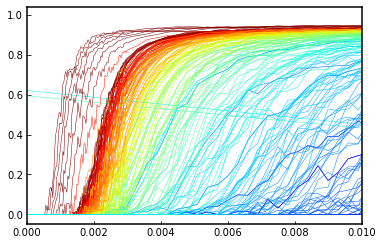

In [47]:
# First I'll need the dense phase data over time
for i in xrange(nSweeps):
    for j in xrange(len(fileContainer[i])):
        plt.plot(all_sims[i][j]['Timestep'][:] / params[i]['brownTime'][j] * 3.0,
                 (all_sims[i][j]['Cgt1000_A'][:] + all_sims[i][j]['Cgt1000_B'][:])/params[i]['partAll'][j],
                 c=plt.cm.jet(params[i]['theoryDenom'][j]/500.0))
plt.xlim(0, 0.01)